## Importing Libraries, packages and Dataset

In [117]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split , cross_val_score , GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,roc_auc_score

from sklearn.feature_selection import chi2,SelectKBest

In [36]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**Input variables (based on physicochemical tests):**

1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide

7 - total sulfur dioxide
8 - density
9 - pH 
10 - sulphates 
11 - alcohol

**Output variable (based on sensory data):**

12 - quality (score between 0 and 10)

**Tips**
* What might be an interesting thing to do, is aside from using regression modelling, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
* This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.
* Without doing any kind of feature engineering or overfitting you should be able to get an AUC of .88 (without even using random forest algorithm)

* KNIME is a great tool (GUI) that can be used for this.

* File Reader (for csv) to linear correlation node and to interactive histogram for basic EDA.
* File Reader to 'Rule Engine Node' to turn the 10 point scale to dichtome variable (good wine and rest), the code to put in the rule engine is something like this:
* $quality$ > 6.5 => "good"   ; TRUE => "bad"
* Rule Engine Node output to input of Column Filter node to filter out your original 10point feature (this prevent leaking)
* Column Filter Node output to input of Partitioning Node (your standard train/tes split, e.g. 75%/25%, choose 'random' or 'stratified')
* Partitioning Node train data split output to input of Train data split to input Decision Tree Learner node and
* Partitioning Node test data split output to input Decision Tree predictor Node
* Decision Tree learner Node output to input Decision Tree Node input
* Decision Tree output to input ROC Node.. (here you can evaluate your model base on AUC value)

Use machine learning to determine which physiochemical properties make a wine 'good'!

## EDA

In [3]:
df.shape

(1599, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

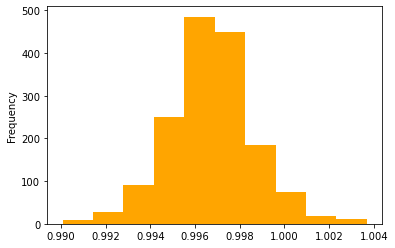

In [7]:
# Density forms a normal distribution.
df['density'].plot(kind = 'hist' , color = 'orange')
plt.xlabel('Density')
PLt.title('Density plot')

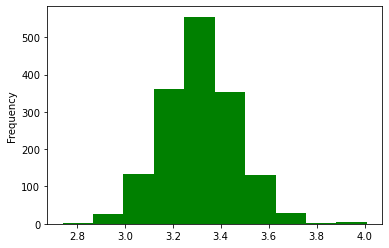

In [8]:
# pH forms a perfect normal distribution.
df.pH.plot(kind = 'hist' , color = 'green')

In [9]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


(12.5, -0.5)

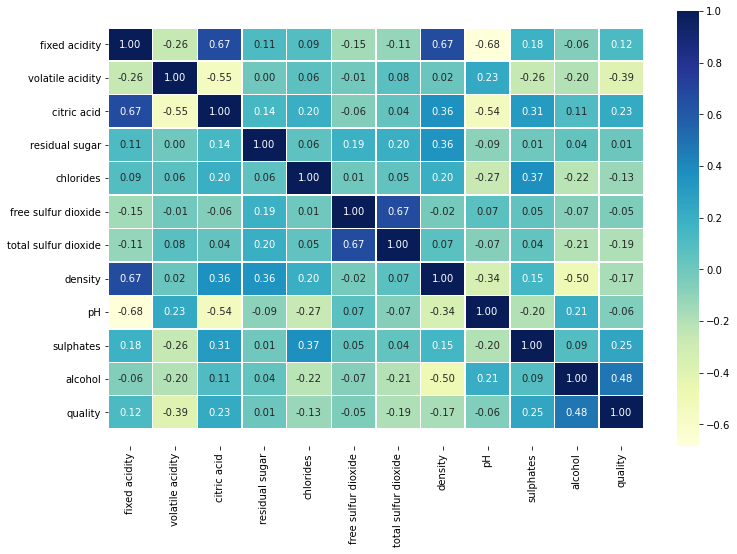

In [10]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

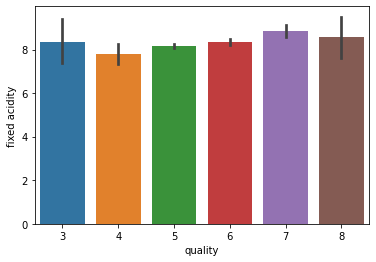

In [11]:
#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure()
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)

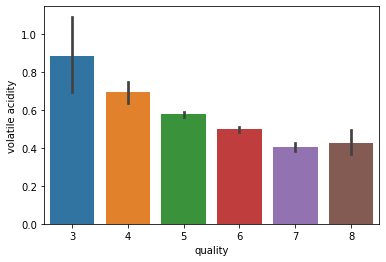

In [12]:
fig = plt.figure()
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

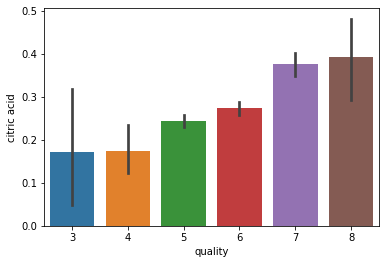

In [13]:
#Composition of citric acid go higher as we go higher in the quality of the wine
fig = plt.figure()
sns.barplot(x = 'quality', y = 'citric acid', data = df)

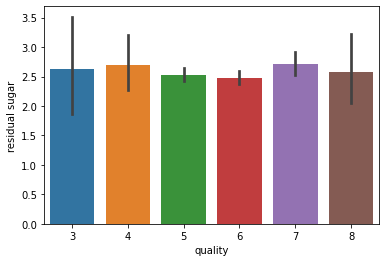

In [14]:
fig = plt.figure()
sns.barplot(x = 'quality' , y = 'residual sugar' , data = df)

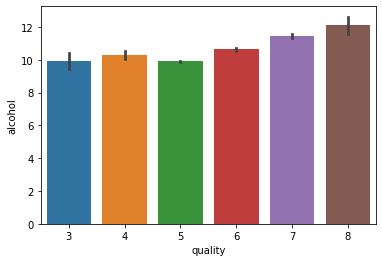

In [15]:
# Quality increases with increase in alcohol
fig = plt.figure()
sns.barplot(x = 'quality' , y = 'alcohol' , data = df)

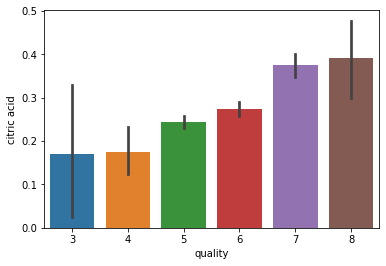

In [16]:
# Citric acid increases the quality of line
fig = plt.figure()
sns.barplot(x ='quality', y ='citric acid' , data = df)

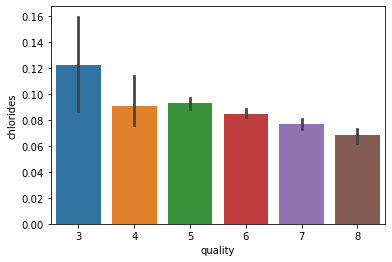

In [17]:
#Composition of chloride also go down as we go higher in the quality of the wine
fig = plt.figure()
sns.barplot(x = 'quality', y = 'chlorides', data = df)

In [18]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [37]:
# Convert continuous data into categorical data:

df.quality = pd.cut(df.quality, bins=[2,6,10] , labels=['bad' , 'good'])

In [38]:
df.quality.head()

0    bad
1    bad
2    bad
3    bad
4    bad
Name: quality, dtype: category
Categories (2, object): [bad < good]

In [39]:
df.quality.value_counts()

bad     1372
good     217
Name: quality, dtype: int64

In [40]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [41]:
df.isna().sum()

fixed acidity            0
volatile acidity         0
citric acid              0
residual sugar           0
chlorides                0
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       0
sulphates                0
alcohol                  0
quality                 10
dtype: int64

In [42]:
# df = df.dropna()

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1589 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         1589 non-null   float64 
 1   volatile acidity      1589 non-null   float64 
 2   citric acid           1589 non-null   float64 
 3   residual sugar        1589 non-null   float64 
 4   chlorides             1589 non-null   float64 
 5   free sulfur dioxide   1589 non-null   float64 
 6   total sulfur dioxide  1589 non-null   float64 
 7   density               1589 non-null   float64 
 8   pH                    1589 non-null   float64 
 9   sulphates             1589 non-null   float64 
 10  alcohol               1589 non-null   float64 
 11  quality               1589 non-null   category
dtypes: category(1), float64(11)
memory usage: 150.6 KB


In [44]:
label_encode = LabelEncoder()
df.quality = label_encode.fit_transform(df.quality)

In [46]:
df.quality.head()

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int32

## Getting the data ready for modelling

In [47]:
X = df.drop('quality', axis = 1) 
y = df.quality

In [48]:
# Lets split the data into training and test sets
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.2 , random_state = 42)

In [49]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((1271, 11), (318, 11), (1271,), (318,))

In [50]:
y_test.value_counts()  # we can see that it is biased towards 0 (Imbalanced data)

0    285
1     33
Name: quality, dtype: int64

## Logistic Regression

In [51]:
lr = LogisticRegression(n_jobs= -1)

# Fit the model
lr.fit(X_train , y_train)

LogisticRegression(n_jobs=-1)

In [52]:
# Predict the output of the test dataset
y_pred = lr.predict(X_test)

#### Evaluate the Logistic Regression model

In [53]:
confusion_matrix(y_pred , y_test)  # biased model towards 0

array([[277,  26],
       [  8,   7]], dtype=int64)

In [54]:
accuracy_score(y_test, y_pred)

0.8930817610062893

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       285
           1       0.47      0.21      0.29        33

    accuracy                           0.89       318
   macro avg       0.69      0.59      0.62       318
weighted avg       0.87      0.89      0.87       318



In [56]:
roc_auc_score(y_test, y_pred)  # to get the insight about our data and higher the roc score better our model performs

0.5920255183413078

In [57]:
cross_val_score(lr,X, y,cv=5).mean()

0.8716187528520128

## Support Vector Classifier(SVC)

In [58]:
svc = SVC()

# Fit the model
svc.fit(X_train, y_train)

SVC()

In [59]:
svc_pred = svc.predict(X_test)

#### Evaluate the SVC Model

In [60]:
accuracy_score(y_test, svc_pred)

0.89937106918239

In [61]:
confusion_matrix(y_test, svc_pred)

array([[285,   0],
       [ 32,   1]], dtype=int64)

In [62]:
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       285
           1       1.00      0.03      0.06        33

    accuracy                           0.90       318
   macro avg       0.95      0.52      0.50       318
weighted avg       0.91      0.90      0.85       318



In [63]:
roc_auc_score(y_test, svc_pred)

0.5151515151515151

In [64]:
cross_val_score(svc,X, y,cv=5).mean()

0.8634367001964168

## Decision Tree

In [65]:
dtc = DecisionTreeClassifier()

In [66]:
# Fit the model
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [67]:
dtc.pred = dtc.predict(X_test)

#### Evaluate the model

In [68]:
accuracy_score(y_test , dtc.pred)

0.889937106918239

In [69]:
confusion_matrix(y_test , dtc.pred)

array([[259,  26],
       [  9,  24]], dtype=int64)

In [70]:
print(classification_report(y_test , dtc.pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       285
           1       0.48      0.73      0.58        33

    accuracy                           0.89       318
   macro avg       0.72      0.82      0.76       318
weighted avg       0.92      0.89      0.90       318



In [71]:
roc_auc_score(y_test , dtc.pred)  

0.8180223285486443

In [72]:
cross_val_score(dtc , X, y, cv=5).mean()

0.8049104219986907

## Random Forest Classifier

In [73]:
rfc = RandomForestClassifier()

In [74]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [75]:
rfc.pred = rfc.predict(X_test)

#### Evaluaton of Random forest model

In [76]:
accuracy_score(y_test , rfc.pred)

0.9308176100628931

In [77]:
confusion_matrix(y_test , rfc.pred)

array([[275,  10],
       [ 12,  21]], dtype=int64)

In [78]:
print(classification_report(y_test , rfc.pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       285
           1       0.68      0.64      0.66        33

    accuracy                           0.93       318
   macro avg       0.82      0.80      0.81       318
weighted avg       0.93      0.93      0.93       318



In [79]:
roc_auc_score(y_test , rfc.pred)

0.8006379585326953

## Hyper parameter Tuning and Feature Importance

As Random Forest has the highest Accuracy Lets do the hyper parameter tuning for the model.

In [81]:
rfc.get_params() 

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [88]:
params = {
            'n_estimators' : np.arange(100, 500 , 100),
            'min_samples_split': [2,4,6,8,10],
            'min_samples_leaf': [1,2],
            'max_features' : ['auto','sqrt',1,2,4],
            'n_jobs' : [-1],
            'max_samples': [100,200,300,400],
            'random_state': [42],
        }
grid_search_cv = GridSearchCV(estimator=rfc , 
                              param_grid=params,
                              cv = 5,
                              
                             )

In [89]:
# %%time
# Fit the gridsearchCV
# grid_search_cv.fit(X_train,y_train)

Fitting 5 folds for each of 800 candidates, totalling 4000 fits
[CV] max_features=auto, max_samples=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100, n_jobs=-1, random_state=42 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_features=auto, max_samples=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100, n_jobs=-1, random_state=42, total=   0.3s
[CV] max_features=auto, max_samples=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100, n_jobs=-1, random_state=42 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_features=auto, max_samples=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100, n_jobs=-1, random_state=42, total=   0.2s
[CV] max_features=auto, max_samples=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100, n_jobs=-1, random_state=42, total=   0.2s
[CV] max_features=auto, max_samples=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100, n_jobs=-1, random_state=42, total=   0.2s
[CV] max_features=auto, max_samples=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100, n_jobs=-1, random_state=42, total=   0.2s
[CV] max_features=auto, max_samples=100, min

[CV]  max_features=auto, max_samples=100, min_samples_leaf=1, min_samples_split=4, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=auto, max_samples=100, min_samples_leaf=1, min_samples_split=4, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=100, min_samples_leaf=1, min_samples_split=4, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=auto, max_samples=100, min_samples_leaf=1, min_samples_split=4, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=100, min_samples_leaf=1, min_samples_split=4, n_estimators=300, n_jobs=-1, random_state=42, total=   0.6s
[CV] max_features=auto, max_samples=100, min_samples_leaf=1, min_samples_split=4, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=100, min_samples_leaf=1, min_samples_split=4, n_estimators=400, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=auto, max_samples=100, min

[CV]  max_features=auto, max_samples=100, min_samples_leaf=1, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=42, total=   0.2s
[CV] max_features=auto, max_samples=100, min_samples_leaf=1, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=100, min_samples_leaf=1, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=42, total=   0.2s
[CV] max_features=auto, max_samples=100, min_samples_leaf=1, min_samples_split=8, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=100, min_samples_leaf=1, min_samples_split=8, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=auto, max_samples=100, min_samples_leaf=1, min_samples_split=8, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=100, min_samples_leaf=1, min_samples_split=8, n_estimators=200, n_jobs=-1, random_state=42, total=   0.5s
[CV] max_features=auto, max_samples=100, min

[CV]  max_features=auto, max_samples=100, min_samples_leaf=1, min_samples_split=10, n_estimators=300, n_jobs=-1, random_state=42, total=   0.6s
[CV] max_features=auto, max_samples=100, min_samples_leaf=1, min_samples_split=10, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=100, min_samples_leaf=1, min_samples_split=10, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=auto, max_samples=100, min_samples_leaf=1, min_samples_split=10, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=100, min_samples_leaf=1, min_samples_split=10, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=auto, max_samples=100, min_samples_leaf=1, min_samples_split=10, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=100, min_samples_leaf=1, min_samples_split=10, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=auto, max_samples=1

[CV]  max_features=auto, max_samples=100, min_samples_leaf=2, min_samples_split=4, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=auto, max_samples=100, min_samples_leaf=2, min_samples_split=4, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=100, min_samples_leaf=2, min_samples_split=4, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=auto, max_samples=100, min_samples_leaf=2, min_samples_split=4, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=100, min_samples_leaf=2, min_samples_split=4, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=auto, max_samples=100, min_samples_leaf=2, min_samples_split=4, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=100, min_samples_leaf=2, min_samples_split=4, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=auto, max_samples=100, min

[CV]  max_features=auto, max_samples=100, min_samples_leaf=2, min_samples_split=6, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=auto, max_samples=100, min_samples_leaf=2, min_samples_split=6, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=100, min_samples_leaf=2, min_samples_split=6, n_estimators=400, n_jobs=-1, random_state=42, total=   0.9s
[CV] max_features=auto, max_samples=100, min_samples_leaf=2, min_samples_split=6, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=100, min_samples_leaf=2, min_samples_split=6, n_estimators=400, n_jobs=-1, random_state=42, total=   0.9s
[CV] max_features=auto, max_samples=100, min_samples_leaf=2, min_samples_split=6, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=100, min_samples_leaf=2, min_samples_split=6, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=auto, max_samples=100, min

[CV]  max_features=auto, max_samples=100, min_samples_leaf=2, min_samples_split=10, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=auto, max_samples=100, min_samples_leaf=2, min_samples_split=10, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=100, min_samples_leaf=2, min_samples_split=10, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=auto, max_samples=100, min_samples_leaf=2, min_samples_split=10, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=100, min_samples_leaf=2, min_samples_split=10, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=auto, max_samples=100, min_samples_leaf=2, min_samples_split=10, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=100, min_samples_leaf=2, min_samples_split=10, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=auto, max_samples=1

[CV]  max_features=auto, max_samples=200, min_samples_leaf=1, min_samples_split=2, n_estimators=400, n_jobs=-1, random_state=42, total=   0.9s
[CV] max_features=auto, max_samples=200, min_samples_leaf=1, min_samples_split=2, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=200, min_samples_leaf=1, min_samples_split=2, n_estimators=400, n_jobs=-1, random_state=42, total=   0.9s
[CV] max_features=auto, max_samples=200, min_samples_leaf=1, min_samples_split=4, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=200, min_samples_leaf=1, min_samples_split=4, n_estimators=100, n_jobs=-1, random_state=42, total=   0.3s
[CV] max_features=auto, max_samples=200, min_samples_leaf=1, min_samples_split=4, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=200, min_samples_leaf=1, min_samples_split=4, n_estimators=100, n_jobs=-1, random_state=42, total=   0.2s
[CV] max_features=auto, max_samples=200, min

[CV]  max_features=auto, max_samples=200, min_samples_leaf=1, min_samples_split=6, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=auto, max_samples=200, min_samples_leaf=1, min_samples_split=6, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=200, min_samples_leaf=1, min_samples_split=6, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=auto, max_samples=200, min_samples_leaf=1, min_samples_split=6, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=200, min_samples_leaf=1, min_samples_split=6, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=auto, max_samples=200, min_samples_leaf=1, min_samples_split=6, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=200, min_samples_leaf=1, min_samples_split=6, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=auto, max_samples=200, min

[CV]  max_features=auto, max_samples=200, min_samples_leaf=1, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=42, total=   0.3s
[CV] max_features=auto, max_samples=200, min_samples_leaf=1, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=200, min_samples_leaf=1, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=42, total=   0.3s
[CV] max_features=auto, max_samples=200, min_samples_leaf=1, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=200, min_samples_leaf=1, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=42, total=   0.2s
[CV] max_features=auto, max_samples=200, min_samples_leaf=1, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=200, min_samples_leaf=1, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=42, total=   0.3s
[CV] max_features=auto, max_samples=2

[CV]  max_features=auto, max_samples=200, min_samples_leaf=2, min_samples_split=2, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=auto, max_samples=200, min_samples_leaf=2, min_samples_split=2, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=200, min_samples_leaf=2, min_samples_split=2, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=auto, max_samples=200, min_samples_leaf=2, min_samples_split=2, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=200, min_samples_leaf=2, min_samples_split=2, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=auto, max_samples=200, min_samples_leaf=2, min_samples_split=2, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=200, min_samples_leaf=2, min_samples_split=2, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=auto, max_samples=200, min

[CV]  max_features=auto, max_samples=200, min_samples_leaf=2, min_samples_split=6, n_estimators=100, n_jobs=-1, random_state=42, total=   0.2s
[CV] max_features=auto, max_samples=200, min_samples_leaf=2, min_samples_split=6, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=200, min_samples_leaf=2, min_samples_split=6, n_estimators=100, n_jobs=-1, random_state=42, total=   0.3s
[CV] max_features=auto, max_samples=200, min_samples_leaf=2, min_samples_split=6, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=200, min_samples_leaf=2, min_samples_split=6, n_estimators=100, n_jobs=-1, random_state=42, total=   0.2s
[CV] max_features=auto, max_samples=200, min_samples_leaf=2, min_samples_split=6, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=200, min_samples_leaf=2, min_samples_split=6, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=auto, max_samples=200, min

[CV]  max_features=auto, max_samples=200, min_samples_leaf=2, min_samples_split=8, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=auto, max_samples=200, min_samples_leaf=2, min_samples_split=8, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=200, min_samples_leaf=2, min_samples_split=8, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=auto, max_samples=200, min_samples_leaf=2, min_samples_split=8, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=200, min_samples_leaf=2, min_samples_split=8, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=auto, max_samples=200, min_samples_leaf=2, min_samples_split=8, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=200, min_samples_leaf=2, min_samples_split=8, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=auto, max_samples=200, min

[CV]  max_features=auto, max_samples=300, min_samples_leaf=1, min_samples_split=2, n_estimators=100, n_jobs=-1, random_state=42, total=   0.2s
[CV] max_features=auto, max_samples=300, min_samples_leaf=1, min_samples_split=2, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=300, min_samples_leaf=1, min_samples_split=2, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=auto, max_samples=300, min_samples_leaf=1, min_samples_split=2, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=300, min_samples_leaf=1, min_samples_split=2, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=auto, max_samples=300, min_samples_leaf=1, min_samples_split=2, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=300, min_samples_leaf=1, min_samples_split=2, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=auto, max_samples=300, min

[CV]  max_features=auto, max_samples=300, min_samples_leaf=1, min_samples_split=4, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=auto, max_samples=300, min_samples_leaf=1, min_samples_split=4, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=300, min_samples_leaf=1, min_samples_split=4, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=auto, max_samples=300, min_samples_leaf=1, min_samples_split=4, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=300, min_samples_leaf=1, min_samples_split=4, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=auto, max_samples=300, min_samples_leaf=1, min_samples_split=4, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=300, min_samples_leaf=1, min_samples_split=4, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=auto, max_samples=300, min

[CV]  max_features=auto, max_samples=300, min_samples_leaf=1, min_samples_split=8, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=auto, max_samples=300, min_samples_leaf=1, min_samples_split=8, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=300, min_samples_leaf=1, min_samples_split=8, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=auto, max_samples=300, min_samples_leaf=1, min_samples_split=8, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=300, min_samples_leaf=1, min_samples_split=8, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=auto, max_samples=300, min_samples_leaf=1, min_samples_split=8, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=300, min_samples_leaf=1, min_samples_split=8, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=auto, max_samples=300, min

[CV]  max_features=auto, max_samples=300, min_samples_leaf=1, min_samples_split=10, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=auto, max_samples=300, min_samples_leaf=1, min_samples_split=10, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=300, min_samples_leaf=1, min_samples_split=10, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=auto, max_samples=300, min_samples_leaf=1, min_samples_split=10, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=300, min_samples_leaf=1, min_samples_split=10, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=auto, max_samples=300, min_samples_leaf=2, min_samples_split=2, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=300, min_samples_leaf=2, min_samples_split=2, n_estimators=100, n_jobs=-1, random_state=42, total=   0.2s
[CV] max_features=auto, max_samples=300

[CV]  max_features=auto, max_samples=300, min_samples_leaf=2, min_samples_split=4, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=auto, max_samples=300, min_samples_leaf=2, min_samples_split=4, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=300, min_samples_leaf=2, min_samples_split=4, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=auto, max_samples=300, min_samples_leaf=2, min_samples_split=4, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=300, min_samples_leaf=2, min_samples_split=4, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=auto, max_samples=300, min_samples_leaf=2, min_samples_split=4, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=300, min_samples_leaf=2, min_samples_split=4, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=auto, max_samples=300, min

[CV]  max_features=auto, max_samples=300, min_samples_leaf=2, min_samples_split=6, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=auto, max_samples=300, min_samples_leaf=2, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=300, min_samples_leaf=2, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=42, total=   0.2s
[CV] max_features=auto, max_samples=300, min_samples_leaf=2, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=300, min_samples_leaf=2, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=42, total=   0.2s
[CV] max_features=auto, max_samples=300, min_samples_leaf=2, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=300, min_samples_leaf=2, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=42, total=   0.3s
[CV] max_features=auto, max_samples=300, min

[CV]  max_features=auto, max_samples=300, min_samples_leaf=2, min_samples_split=10, n_estimators=300, n_jobs=-1, random_state=42, total=   0.6s
[CV] max_features=auto, max_samples=300, min_samples_leaf=2, min_samples_split=10, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=300, min_samples_leaf=2, min_samples_split=10, n_estimators=300, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=auto, max_samples=300, min_samples_leaf=2, min_samples_split=10, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=300, min_samples_leaf=2, min_samples_split=10, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=auto, max_samples=300, min_samples_leaf=2, min_samples_split=10, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=300, min_samples_leaf=2, min_samples_split=10, n_estimators=300, n_jobs=-1, random_state=42, total=   0.6s
[CV] max_features=auto, max_samples=3

[CV]  max_features=auto, max_samples=400, min_samples_leaf=1, min_samples_split=4, n_estimators=100, n_jobs=-1, random_state=42, total=   0.2s
[CV] max_features=auto, max_samples=400, min_samples_leaf=1, min_samples_split=4, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=400, min_samples_leaf=1, min_samples_split=4, n_estimators=100, n_jobs=-1, random_state=42, total=   0.2s
[CV] max_features=auto, max_samples=400, min_samples_leaf=1, min_samples_split=4, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=400, min_samples_leaf=1, min_samples_split=4, n_estimators=100, n_jobs=-1, random_state=42, total=   0.3s
[CV] max_features=auto, max_samples=400, min_samples_leaf=1, min_samples_split=4, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=400, min_samples_leaf=1, min_samples_split=4, n_estimators=100, n_jobs=-1, random_state=42, total=   0.2s
[CV] max_features=auto, max_samples=400, min

[CV]  max_features=auto, max_samples=400, min_samples_leaf=1, min_samples_split=6, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=auto, max_samples=400, min_samples_leaf=1, min_samples_split=6, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=400, min_samples_leaf=1, min_samples_split=6, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=auto, max_samples=400, min_samples_leaf=1, min_samples_split=6, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=400, min_samples_leaf=1, min_samples_split=6, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=auto, max_samples=400, min_samples_leaf=1, min_samples_split=6, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=400, min_samples_leaf=1, min_samples_split=6, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=auto, max_samples=400, min

[CV]  max_features=auto, max_samples=400, min_samples_leaf=1, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=42, total=   0.3s
[CV] max_features=auto, max_samples=400, min_samples_leaf=1, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=400, min_samples_leaf=1, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=42, total=   0.3s
[CV] max_features=auto, max_samples=400, min_samples_leaf=1, min_samples_split=10, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=400, min_samples_leaf=1, min_samples_split=10, n_estimators=200, n_jobs=-1, random_state=42, total=   0.5s
[CV] max_features=auto, max_samples=400, min_samples_leaf=1, min_samples_split=10, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=400, min_samples_leaf=1, min_samples_split=10, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=auto, max_samples=4

[CV]  max_features=auto, max_samples=400, min_samples_leaf=2, min_samples_split=2, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=auto, max_samples=400, min_samples_leaf=2, min_samples_split=2, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=400, min_samples_leaf=2, min_samples_split=2, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=auto, max_samples=400, min_samples_leaf=2, min_samples_split=2, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=400, min_samples_leaf=2, min_samples_split=2, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=auto, max_samples=400, min_samples_leaf=2, min_samples_split=2, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=400, min_samples_leaf=2, min_samples_split=2, n_estimators=400, n_jobs=-1, random_state=42, total=   0.9s
[CV] max_features=auto, max_samples=400, min

[CV]  max_features=auto, max_samples=400, min_samples_leaf=2, min_samples_split=6, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=auto, max_samples=400, min_samples_leaf=2, min_samples_split=6, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=400, min_samples_leaf=2, min_samples_split=6, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=auto, max_samples=400, min_samples_leaf=2, min_samples_split=6, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=400, min_samples_leaf=2, min_samples_split=6, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=auto, max_samples=400, min_samples_leaf=2, min_samples_split=6, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=400, min_samples_leaf=2, min_samples_split=6, n_estimators=200, n_jobs=-1, random_state=42, total=   0.5s
[CV] max_features=auto, max_samples=400, min

[CV]  max_features=auto, max_samples=400, min_samples_leaf=2, min_samples_split=8, n_estimators=400, n_jobs=-1, random_state=42, total=   0.9s
[CV] max_features=auto, max_samples=400, min_samples_leaf=2, min_samples_split=8, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=400, min_samples_leaf=2, min_samples_split=8, n_estimators=400, n_jobs=-1, random_state=42, total=   0.9s
[CV] max_features=auto, max_samples=400, min_samples_leaf=2, min_samples_split=8, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=400, min_samples_leaf=2, min_samples_split=8, n_estimators=400, n_jobs=-1, random_state=42, total=   0.9s
[CV] max_features=auto, max_samples=400, min_samples_leaf=2, min_samples_split=8, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=auto, max_samples=400, min_samples_leaf=2, min_samples_split=8, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=auto, max_samples=400, min

[CV]  max_features=sqrt, max_samples=100, min_samples_leaf=1, min_samples_split=2, n_estimators=200, n_jobs=-1, random_state=42, total=   0.5s
[CV] max_features=sqrt, max_samples=100, min_samples_leaf=1, min_samples_split=2, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=100, min_samples_leaf=1, min_samples_split=2, n_estimators=200, n_jobs=-1, random_state=42, total=   0.5s
[CV] max_features=sqrt, max_samples=100, min_samples_leaf=1, min_samples_split=2, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=100, min_samples_leaf=1, min_samples_split=2, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=sqrt, max_samples=100, min_samples_leaf=1, min_samples_split=2, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=100, min_samples_leaf=1, min_samples_split=2, n_estimators=300, n_jobs=-1, random_state=42, total=   0.6s
[CV] max_features=sqrt, max_samples=100, min

[CV]  max_features=sqrt, max_samples=100, min_samples_leaf=1, min_samples_split=4, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=sqrt, max_samples=100, min_samples_leaf=1, min_samples_split=4, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=100, min_samples_leaf=1, min_samples_split=4, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=sqrt, max_samples=100, min_samples_leaf=1, min_samples_split=6, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=100, min_samples_leaf=1, min_samples_split=6, n_estimators=100, n_jobs=-1, random_state=42, total=   0.2s
[CV] max_features=sqrt, max_samples=100, min_samples_leaf=1, min_samples_split=6, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=100, min_samples_leaf=1, min_samples_split=6, n_estimators=100, n_jobs=-1, random_state=42, total=   0.2s
[CV] max_features=sqrt, max_samples=100, min

[CV]  max_features=sqrt, max_samples=100, min_samples_leaf=1, min_samples_split=8, n_estimators=200, n_jobs=-1, random_state=42, total=   0.5s
[CV] max_features=sqrt, max_samples=100, min_samples_leaf=1, min_samples_split=8, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=100, min_samples_leaf=1, min_samples_split=8, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=sqrt, max_samples=100, min_samples_leaf=1, min_samples_split=8, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=100, min_samples_leaf=1, min_samples_split=8, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=sqrt, max_samples=100, min_samples_leaf=1, min_samples_split=8, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=100, min_samples_leaf=1, min_samples_split=8, n_estimators=300, n_jobs=-1, random_state=42, total=   0.6s
[CV] max_features=sqrt, max_samples=100, min

[CV]  max_features=sqrt, max_samples=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100, n_jobs=-1, random_state=42, total=   0.2s
[CV] max_features=sqrt, max_samples=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100, n_jobs=-1, random_state=42, total=   0.2s
[CV] max_features=sqrt, max_samples=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100, n_jobs=-1, random_state=42, total=   0.2s
[CV] max_features=sqrt, max_samples=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100, n_jobs=-1, random_state=42, total=   0.2s
[CV] max_features=sqrt, max_samples=100, min

[CV]  max_features=sqrt, max_samples=100, min_samples_leaf=2, min_samples_split=4, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=sqrt, max_samples=100, min_samples_leaf=2, min_samples_split=4, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=100, min_samples_leaf=2, min_samples_split=4, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=sqrt, max_samples=100, min_samples_leaf=2, min_samples_split=4, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=100, min_samples_leaf=2, min_samples_split=4, n_estimators=300, n_jobs=-1, random_state=42, total=   0.6s
[CV] max_features=sqrt, max_samples=100, min_samples_leaf=2, min_samples_split=4, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=100, min_samples_leaf=2, min_samples_split=4, n_estimators=300, n_jobs=-1, random_state=42, total=   0.6s
[CV] max_features=sqrt, max_samples=100, min

[CV]  max_features=sqrt, max_samples=100, min_samples_leaf=2, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=42, total=   0.2s
[CV] max_features=sqrt, max_samples=100, min_samples_leaf=2, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=100, min_samples_leaf=2, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=42, total=   0.2s
[CV] max_features=sqrt, max_samples=100, min_samples_leaf=2, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=100, min_samples_leaf=2, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=42, total=   0.2s
[CV] max_features=sqrt, max_samples=100, min_samples_leaf=2, min_samples_split=8, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=100, min_samples_leaf=2, min_samples_split=8, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=sqrt, max_samples=100, min

[CV]  max_features=sqrt, max_samples=100, min_samples_leaf=2, min_samples_split=10, n_estimators=300, n_jobs=-1, random_state=42, total=   0.6s
[CV] max_features=sqrt, max_samples=100, min_samples_leaf=2, min_samples_split=10, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=100, min_samples_leaf=2, min_samples_split=10, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=sqrt, max_samples=100, min_samples_leaf=2, min_samples_split=10, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=100, min_samples_leaf=2, min_samples_split=10, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=sqrt, max_samples=100, min_samples_leaf=2, min_samples_split=10, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=100, min_samples_leaf=2, min_samples_split=10, n_estimators=400, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=sqrt, max_samples=1

[CV]  max_features=sqrt, max_samples=200, min_samples_leaf=1, min_samples_split=4, n_estimators=100, n_jobs=-1, random_state=42, total=   0.2s
[CV] max_features=sqrt, max_samples=200, min_samples_leaf=1, min_samples_split=4, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=200, min_samples_leaf=1, min_samples_split=4, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=sqrt, max_samples=200, min_samples_leaf=1, min_samples_split=4, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=200, min_samples_leaf=1, min_samples_split=4, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=sqrt, max_samples=200, min_samples_leaf=1, min_samples_split=4, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=200, min_samples_leaf=1, min_samples_split=4, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=sqrt, max_samples=200, min

[CV]  max_features=sqrt, max_samples=200, min_samples_leaf=1, min_samples_split=6, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=sqrt, max_samples=200, min_samples_leaf=1, min_samples_split=6, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=200, min_samples_leaf=1, min_samples_split=6, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=sqrt, max_samples=200, min_samples_leaf=1, min_samples_split=6, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=200, min_samples_leaf=1, min_samples_split=6, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=sqrt, max_samples=200, min_samples_leaf=1, min_samples_split=6, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=200, min_samples_leaf=1, min_samples_split=6, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=sqrt, max_samples=200, min

[CV]  max_features=sqrt, max_samples=200, min_samples_leaf=1, min_samples_split=10, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=sqrt, max_samples=200, min_samples_leaf=1, min_samples_split=10, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=200, min_samples_leaf=1, min_samples_split=10, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=sqrt, max_samples=200, min_samples_leaf=1, min_samples_split=10, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=200, min_samples_leaf=1, min_samples_split=10, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=sqrt, max_samples=200, min_samples_leaf=1, min_samples_split=10, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=200, min_samples_leaf=1, min_samples_split=10, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=sqrt, max_samples=2

[CV]  max_features=sqrt, max_samples=200, min_samples_leaf=2, min_samples_split=2, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=sqrt, max_samples=200, min_samples_leaf=2, min_samples_split=2, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=200, min_samples_leaf=2, min_samples_split=2, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=sqrt, max_samples=200, min_samples_leaf=2, min_samples_split=2, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=200, min_samples_leaf=2, min_samples_split=2, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=sqrt, max_samples=200, min_samples_leaf=2, min_samples_split=4, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=200, min_samples_leaf=2, min_samples_split=4, n_estimators=100, n_jobs=-1, random_state=42, total=   0.2s
[CV] max_features=sqrt, max_samples=200, min

[CV]  max_features=sqrt, max_samples=200, min_samples_leaf=2, min_samples_split=6, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=sqrt, max_samples=200, min_samples_leaf=2, min_samples_split=6, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=200, min_samples_leaf=2, min_samples_split=6, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=sqrt, max_samples=200, min_samples_leaf=2, min_samples_split=6, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=200, min_samples_leaf=2, min_samples_split=6, n_estimators=300, n_jobs=-1, random_state=42, total=   0.6s
[CV] max_features=sqrt, max_samples=200, min_samples_leaf=2, min_samples_split=6, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=200, min_samples_leaf=2, min_samples_split=6, n_estimators=300, n_jobs=-1, random_state=42, total=   0.6s
[CV] max_features=sqrt, max_samples=200, min

[CV]  max_features=sqrt, max_samples=200, min_samples_leaf=2, min_samples_split=8, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=sqrt, max_samples=200, min_samples_leaf=2, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=200, min_samples_leaf=2, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=42, total=   0.2s
[CV] max_features=sqrt, max_samples=200, min_samples_leaf=2, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=200, min_samples_leaf=2, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=42, total=   0.2s
[CV] max_features=sqrt, max_samples=200, min_samples_leaf=2, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=200, min_samples_leaf=2, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=42, total=   0.3s
[CV] max_features=sqrt, max_samples=20

[CV]  max_features=sqrt, max_samples=300, min_samples_leaf=1, min_samples_split=2, n_estimators=300, n_jobs=-1, random_state=42, total=   0.6s
[CV] max_features=sqrt, max_samples=300, min_samples_leaf=1, min_samples_split=2, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=300, min_samples_leaf=1, min_samples_split=2, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=sqrt, max_samples=300, min_samples_leaf=1, min_samples_split=2, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=300, min_samples_leaf=1, min_samples_split=2, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=sqrt, max_samples=300, min_samples_leaf=1, min_samples_split=2, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=300, min_samples_leaf=1, min_samples_split=2, n_estimators=300, n_jobs=-1, random_state=42, total=   0.6s
[CV] max_features=sqrt, max_samples=300, min

[CV]  max_features=sqrt, max_samples=300, min_samples_leaf=1, min_samples_split=6, n_estimators=100, n_jobs=-1, random_state=42, total=   0.2s
[CV] max_features=sqrt, max_samples=300, min_samples_leaf=1, min_samples_split=6, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=300, min_samples_leaf=1, min_samples_split=6, n_estimators=100, n_jobs=-1, random_state=42, total=   0.2s
[CV] max_features=sqrt, max_samples=300, min_samples_leaf=1, min_samples_split=6, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=300, min_samples_leaf=1, min_samples_split=6, n_estimators=100, n_jobs=-1, random_state=42, total=   0.2s
[CV] max_features=sqrt, max_samples=300, min_samples_leaf=1, min_samples_split=6, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=300, min_samples_leaf=1, min_samples_split=6, n_estimators=100, n_jobs=-1, random_state=42, total=   0.2s
[CV] max_features=sqrt, max_samples=300, min

[CV]  max_features=sqrt, max_samples=300, min_samples_leaf=1, min_samples_split=8, n_estimators=300, n_jobs=-1, random_state=42, total=   0.6s
[CV] max_features=sqrt, max_samples=300, min_samples_leaf=1, min_samples_split=8, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=300, min_samples_leaf=1, min_samples_split=8, n_estimators=300, n_jobs=-1, random_state=42, total=   0.6s
[CV] max_features=sqrt, max_samples=300, min_samples_leaf=1, min_samples_split=8, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=300, min_samples_leaf=1, min_samples_split=8, n_estimators=300, n_jobs=-1, random_state=42, total=   0.6s
[CV] max_features=sqrt, max_samples=300, min_samples_leaf=1, min_samples_split=8, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=300, min_samples_leaf=1, min_samples_split=8, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=sqrt, max_samples=300, min

[CV]  max_features=sqrt, max_samples=300, min_samples_leaf=2, min_samples_split=2, n_estimators=100, n_jobs=-1, random_state=42, total=   0.2s
[CV] max_features=sqrt, max_samples=300, min_samples_leaf=2, min_samples_split=2, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=300, min_samples_leaf=2, min_samples_split=2, n_estimators=100, n_jobs=-1, random_state=42, total=   0.2s
[CV] max_features=sqrt, max_samples=300, min_samples_leaf=2, min_samples_split=2, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=300, min_samples_leaf=2, min_samples_split=2, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=sqrt, max_samples=300, min_samples_leaf=2, min_samples_split=2, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=300, min_samples_leaf=2, min_samples_split=2, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=sqrt, max_samples=300, min

[CV]  max_features=sqrt, max_samples=300, min_samples_leaf=2, min_samples_split=4, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=sqrt, max_samples=300, min_samples_leaf=2, min_samples_split=4, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=300, min_samples_leaf=2, min_samples_split=4, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=sqrt, max_samples=300, min_samples_leaf=2, min_samples_split=4, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=300, min_samples_leaf=2, min_samples_split=4, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=sqrt, max_samples=300, min_samples_leaf=2, min_samples_split=4, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=300, min_samples_leaf=2, min_samples_split=4, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=sqrt, max_samples=300, min

[CV]  max_features=sqrt, max_samples=300, min_samples_leaf=2, min_samples_split=8, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=sqrt, max_samples=300, min_samples_leaf=2, min_samples_split=8, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=300, min_samples_leaf=2, min_samples_split=8, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=sqrt, max_samples=300, min_samples_leaf=2, min_samples_split=8, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=300, min_samples_leaf=2, min_samples_split=8, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=sqrt, max_samples=300, min_samples_leaf=2, min_samples_split=8, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=300, min_samples_leaf=2, min_samples_split=8, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=sqrt, max_samples=300, min

[CV]  max_features=sqrt, max_samples=300, min_samples_leaf=2, min_samples_split=10, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=sqrt, max_samples=300, min_samples_leaf=2, min_samples_split=10, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=300, min_samples_leaf=2, min_samples_split=10, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=sqrt, max_samples=300, min_samples_leaf=2, min_samples_split=10, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=300, min_samples_leaf=2, min_samples_split=10, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=sqrt, max_samples=300, min_samples_leaf=2, min_samples_split=10, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=300, min_samples_leaf=2, min_samples_split=10, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=sqrt, max_samples=4

[CV]  max_features=sqrt, max_samples=400, min_samples_leaf=1, min_samples_split=4, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=sqrt, max_samples=400, min_samples_leaf=1, min_samples_split=4, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=400, min_samples_leaf=1, min_samples_split=4, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=sqrt, max_samples=400, min_samples_leaf=1, min_samples_split=4, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=400, min_samples_leaf=1, min_samples_split=4, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=sqrt, max_samples=400, min_samples_leaf=1, min_samples_split=4, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=400, min_samples_leaf=1, min_samples_split=4, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=sqrt, max_samples=400, min

[CV]  max_features=sqrt, max_samples=400, min_samples_leaf=1, min_samples_split=6, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=sqrt, max_samples=400, min_samples_leaf=1, min_samples_split=6, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=400, min_samples_leaf=1, min_samples_split=6, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=sqrt, max_samples=400, min_samples_leaf=1, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=400, min_samples_leaf=1, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=42, total=   0.2s
[CV] max_features=sqrt, max_samples=400, min_samples_leaf=1, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=400, min_samples_leaf=1, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=42, total=   0.2s
[CV] max_features=sqrt, max_samples=400, min

[CV]  max_features=sqrt, max_samples=400, min_samples_leaf=1, min_samples_split=10, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=sqrt, max_samples=400, min_samples_leaf=1, min_samples_split=10, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=400, min_samples_leaf=1, min_samples_split=10, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=sqrt, max_samples=400, min_samples_leaf=1, min_samples_split=10, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=400, min_samples_leaf=1, min_samples_split=10, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=sqrt, max_samples=400, min_samples_leaf=1, min_samples_split=10, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=400, min_samples_leaf=1, min_samples_split=10, n_estimators=300, n_jobs=-1, random_state=42, total=   0.6s
[CV] max_features=sqrt, max_samples=4

[CV]  max_features=sqrt, max_samples=400, min_samples_leaf=2, min_samples_split=4, n_estimators=100, n_jobs=-1, random_state=42, total=   0.2s
[CV] max_features=sqrt, max_samples=400, min_samples_leaf=2, min_samples_split=4, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=400, min_samples_leaf=2, min_samples_split=4, n_estimators=100, n_jobs=-1, random_state=42, total=   0.3s
[CV] max_features=sqrt, max_samples=400, min_samples_leaf=2, min_samples_split=4, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=400, min_samples_leaf=2, min_samples_split=4, n_estimators=100, n_jobs=-1, random_state=42, total=   0.3s
[CV] max_features=sqrt, max_samples=400, min_samples_leaf=2, min_samples_split=4, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=400, min_samples_leaf=2, min_samples_split=4, n_estimators=100, n_jobs=-1, random_state=42, total=   0.3s
[CV] max_features=sqrt, max_samples=400, min

[CV]  max_features=sqrt, max_samples=400, min_samples_leaf=2, min_samples_split=6, n_estimators=300, n_jobs=-1, random_state=42, total=   0.6s
[CV] max_features=sqrt, max_samples=400, min_samples_leaf=2, min_samples_split=6, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=400, min_samples_leaf=2, min_samples_split=6, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=sqrt, max_samples=400, min_samples_leaf=2, min_samples_split=6, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=400, min_samples_leaf=2, min_samples_split=6, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=sqrt, max_samples=400, min_samples_leaf=2, min_samples_split=6, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=400, min_samples_leaf=2, min_samples_split=6, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=sqrt, max_samples=400, min

[CV]  max_features=sqrt, max_samples=400, min_samples_leaf=2, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=42, total=   0.3s
[CV] max_features=sqrt, max_samples=400, min_samples_leaf=2, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=400, min_samples_leaf=2, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=42, total=   0.3s
[CV] max_features=sqrt, max_samples=400, min_samples_leaf=2, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=400, min_samples_leaf=2, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=42, total=   0.3s
[CV] max_features=sqrt, max_samples=400, min_samples_leaf=2, min_samples_split=10, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=sqrt, max_samples=400, min_samples_leaf=2, min_samples_split=10, n_estimators=200, n_jobs=-1, random_state=42, total=   0.5s
[CV] max_features=sqrt, max_samples=4

[CV]  max_features=1, max_samples=100, min_samples_leaf=1, min_samples_split=2, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=1, max_samples=100, min_samples_leaf=1, min_samples_split=2, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=100, min_samples_leaf=1, min_samples_split=2, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=1, max_samples=100, min_samples_leaf=1, min_samples_split=2, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=100, min_samples_leaf=1, min_samples_split=2, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=1, max_samples=100, min_samples_leaf=1, min_samples_split=2, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=100, min_samples_leaf=1, min_samples_split=2, n_estimators=400, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=1, max_samples=100, min_samples_leaf=1, min_sam

[CV]  max_features=1, max_samples=100, min_samples_leaf=1, min_samples_split=6, n_estimators=100, n_jobs=-1, random_state=42, total=   0.3s
[CV] max_features=1, max_samples=100, min_samples_leaf=1, min_samples_split=6, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=100, min_samples_leaf=1, min_samples_split=6, n_estimators=200, n_jobs=-1, random_state=42, total=   0.5s
[CV] max_features=1, max_samples=100, min_samples_leaf=1, min_samples_split=6, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=100, min_samples_leaf=1, min_samples_split=6, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=1, max_samples=100, min_samples_leaf=1, min_samples_split=6, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=100, min_samples_leaf=1, min_samples_split=6, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=1, max_samples=100, min_samples_leaf=1, min_sam

[CV]  max_features=1, max_samples=100, min_samples_leaf=1, min_samples_split=8, n_estimators=400, n_jobs=-1, random_state=42, total=   0.9s
[CV] max_features=1, max_samples=100, min_samples_leaf=1, min_samples_split=8, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=100, min_samples_leaf=1, min_samples_split=8, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=1, max_samples=100, min_samples_leaf=1, min_samples_split=8, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=100, min_samples_leaf=1, min_samples_split=8, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=1, max_samples=100, min_samples_leaf=1, min_samples_split=8, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=100, min_samples_leaf=1, min_samples_split=8, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=1, max_samples=100, min_samples_leaf=1, min_sam

[CV]  max_features=1, max_samples=100, min_samples_leaf=2, min_samples_split=2, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=1, max_samples=100, min_samples_leaf=2, min_samples_split=2, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=100, min_samples_leaf=2, min_samples_split=2, n_estimators=200, n_jobs=-1, random_state=42, total=   0.5s
[CV] max_features=1, max_samples=100, min_samples_leaf=2, min_samples_split=2, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=100, min_samples_leaf=2, min_samples_split=2, n_estimators=200, n_jobs=-1, random_state=42, total=   0.5s
[CV] max_features=1, max_samples=100, min_samples_leaf=2, min_samples_split=2, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=100, min_samples_leaf=2, min_samples_split=2, n_estimators=200, n_jobs=-1, random_state=42, total=   0.5s
[CV] max_features=1, max_samples=100, min_samples_leaf=2, min_sam

[CV]  max_features=1, max_samples=100, min_samples_leaf=2, min_samples_split=4, n_estimators=400, n_jobs=-1, random_state=42, total=   0.9s
[CV] max_features=1, max_samples=100, min_samples_leaf=2, min_samples_split=4, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=100, min_samples_leaf=2, min_samples_split=4, n_estimators=400, n_jobs=-1, random_state=42, total=   0.9s
[CV] max_features=1, max_samples=100, min_samples_leaf=2, min_samples_split=4, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=100, min_samples_leaf=2, min_samples_split=4, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=1, max_samples=100, min_samples_leaf=2, min_samples_split=6, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=100, min_samples_leaf=2, min_samples_split=6, n_estimators=100, n_jobs=-1, random_state=42, total=   0.2s
[CV] max_features=1, max_samples=100, min_samples_leaf=2, min_sam

[CV]  max_features=1, max_samples=100, min_samples_leaf=2, min_samples_split=8, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=1, max_samples=100, min_samples_leaf=2, min_samples_split=8, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=100, min_samples_leaf=2, min_samples_split=8, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=1, max_samples=100, min_samples_leaf=2, min_samples_split=8, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=100, min_samples_leaf=2, min_samples_split=8, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=1, max_samples=100, min_samples_leaf=2, min_samples_split=8, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=100, min_samples_leaf=2, min_samples_split=8, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=1, max_samples=100, min_samples_leaf=2, min_sam

[CV]  max_features=1, max_samples=100, min_samples_leaf=2, min_samples_split=10, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=1, max_samples=200, min_samples_leaf=1, min_samples_split=2, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=200, min_samples_leaf=1, min_samples_split=2, n_estimators=100, n_jobs=-1, random_state=42, total=   0.3s
[CV] max_features=1, max_samples=200, min_samples_leaf=1, min_samples_split=2, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=200, min_samples_leaf=1, min_samples_split=2, n_estimators=100, n_jobs=-1, random_state=42, total=   0.3s
[CV] max_features=1, max_samples=200, min_samples_leaf=1, min_samples_split=2, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=200, min_samples_leaf=1, min_samples_split=2, n_estimators=100, n_jobs=-1, random_state=42, total=   0.2s
[CV] max_features=1, max_samples=200, min_samples_leaf=1, min_sa

[CV]  max_features=1, max_samples=200, min_samples_leaf=1, min_samples_split=4, n_estimators=300, n_jobs=-1, random_state=42, total=   0.6s
[CV] max_features=1, max_samples=200, min_samples_leaf=1, min_samples_split=4, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=200, min_samples_leaf=1, min_samples_split=4, n_estimators=300, n_jobs=-1, random_state=42, total=   0.6s
[CV] max_features=1, max_samples=200, min_samples_leaf=1, min_samples_split=4, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=200, min_samples_leaf=1, min_samples_split=4, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=1, max_samples=200, min_samples_leaf=1, min_samples_split=4, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=200, min_samples_leaf=1, min_samples_split=4, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=1, max_samples=200, min_samples_leaf=1, min_sam

[CV]  max_features=1, max_samples=200, min_samples_leaf=1, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=42, total=   0.2s
[CV] max_features=1, max_samples=200, min_samples_leaf=1, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=200, min_samples_leaf=1, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=42, total=   0.2s
[CV] max_features=1, max_samples=200, min_samples_leaf=1, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=200, min_samples_leaf=1, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=42, total=   0.2s
[CV] max_features=1, max_samples=200, min_samples_leaf=1, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=200, min_samples_leaf=1, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=42, total=   0.2s
[CV] max_features=1, max_samples=200, min_samples_leaf=1, min_sam

[CV]  max_features=1, max_samples=200, min_samples_leaf=1, min_samples_split=10, n_estimators=300, n_jobs=-1, random_state=42, total=   0.6s
[CV] max_features=1, max_samples=200, min_samples_leaf=1, min_samples_split=10, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=200, min_samples_leaf=1, min_samples_split=10, n_estimators=300, n_jobs=-1, random_state=42, total=   0.6s
[CV] max_features=1, max_samples=200, min_samples_leaf=1, min_samples_split=10, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=200, min_samples_leaf=1, min_samples_split=10, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=1, max_samples=200, min_samples_leaf=1, min_samples_split=10, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=200, min_samples_leaf=1, min_samples_split=10, n_estimators=400, n_jobs=-1, random_state=42, total=   0.9s
[CV] max_features=1, max_samples=200, min_samples_leaf=1, 

[CV]  max_features=1, max_samples=200, min_samples_leaf=2, min_samples_split=4, n_estimators=100, n_jobs=-1, random_state=42, total=   0.2s
[CV] max_features=1, max_samples=200, min_samples_leaf=2, min_samples_split=4, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=200, min_samples_leaf=2, min_samples_split=4, n_estimators=100, n_jobs=-1, random_state=42, total=   0.2s
[CV] max_features=1, max_samples=200, min_samples_leaf=2, min_samples_split=4, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=200, min_samples_leaf=2, min_samples_split=4, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=1, max_samples=200, min_samples_leaf=2, min_samples_split=4, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=200, min_samples_leaf=2, min_samples_split=4, n_estimators=200, n_jobs=-1, random_state=42, total=   0.5s
[CV] max_features=1, max_samples=200, min_samples_leaf=2, min_sam

[CV]  max_features=1, max_samples=200, min_samples_leaf=2, min_samples_split=6, n_estimators=300, n_jobs=-1, random_state=42, total=   0.6s
[CV] max_features=1, max_samples=200, min_samples_leaf=2, min_samples_split=6, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=200, min_samples_leaf=2, min_samples_split=6, n_estimators=400, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=1, max_samples=200, min_samples_leaf=2, min_samples_split=6, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=200, min_samples_leaf=2, min_samples_split=6, n_estimators=400, n_jobs=-1, random_state=42, total=   0.9s
[CV] max_features=1, max_samples=200, min_samples_leaf=2, min_samples_split=6, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=200, min_samples_leaf=2, min_samples_split=6, n_estimators=400, n_jobs=-1, random_state=42, total=   0.9s
[CV] max_features=1, max_samples=200, min_samples_leaf=2, min_sam

[CV]  max_features=1, max_samples=200, min_samples_leaf=2, min_samples_split=10, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=1, max_samples=200, min_samples_leaf=2, min_samples_split=10, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=200, min_samples_leaf=2, min_samples_split=10, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=1, max_samples=200, min_samples_leaf=2, min_samples_split=10, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=200, min_samples_leaf=2, min_samples_split=10, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=1, max_samples=200, min_samples_leaf=2, min_samples_split=10, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=200, min_samples_leaf=2, min_samples_split=10, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=1, max_samples=200, min_samples_leaf=2, 

[CV]  max_features=1, max_samples=300, min_samples_leaf=1, min_samples_split=2, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=1, max_samples=300, min_samples_leaf=1, min_samples_split=2, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=300, min_samples_leaf=1, min_samples_split=2, n_estimators=400, n_jobs=-1, random_state=42, total=   0.9s
[CV] max_features=1, max_samples=300, min_samples_leaf=1, min_samples_split=2, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=300, min_samples_leaf=1, min_samples_split=2, n_estimators=400, n_jobs=-1, random_state=42, total=   0.9s
[CV] max_features=1, max_samples=300, min_samples_leaf=1, min_samples_split=2, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=300, min_samples_leaf=1, min_samples_split=2, n_estimators=400, n_jobs=-1, random_state=42, total=   0.9s
[CV] max_features=1, max_samples=300, min_samples_leaf=1, min_sam

[CV]  max_features=1, max_samples=300, min_samples_leaf=1, min_samples_split=6, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=1, max_samples=300, min_samples_leaf=1, min_samples_split=6, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=300, min_samples_leaf=1, min_samples_split=6, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=1, max_samples=300, min_samples_leaf=1, min_samples_split=6, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=300, min_samples_leaf=1, min_samples_split=6, n_estimators=200, n_jobs=-1, random_state=42, total=   0.5s
[CV] max_features=1, max_samples=300, min_samples_leaf=1, min_samples_split=6, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=300, min_samples_leaf=1, min_samples_split=6, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=1, max_samples=300, min_samples_leaf=1, min_sam

[CV]  max_features=1, max_samples=300, min_samples_leaf=1, min_samples_split=8, n_estimators=400, n_jobs=-1, random_state=42, total=   0.9s
[CV] max_features=1, max_samples=300, min_samples_leaf=1, min_samples_split=8, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=300, min_samples_leaf=1, min_samples_split=8, n_estimators=400, n_jobs=-1, random_state=42, total=   0.9s
[CV] max_features=1, max_samples=300, min_samples_leaf=1, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=300, min_samples_leaf=1, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=42, total=   0.2s
[CV] max_features=1, max_samples=300, min_samples_leaf=1, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=300, min_samples_leaf=1, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=42, total=   0.3s
[CV] max_features=1, max_samples=300, min_samples_leaf=1, min

[CV]  max_features=1, max_samples=300, min_samples_leaf=2, min_samples_split=2, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=1, max_samples=300, min_samples_leaf=2, min_samples_split=2, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=300, min_samples_leaf=2, min_samples_split=2, n_estimators=300, n_jobs=-1, random_state=42, total=   0.6s
[CV] max_features=1, max_samples=300, min_samples_leaf=2, min_samples_split=2, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=300, min_samples_leaf=2, min_samples_split=2, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=1, max_samples=300, min_samples_leaf=2, min_samples_split=2, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=300, min_samples_leaf=2, min_samples_split=2, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=1, max_samples=300, min_samples_leaf=2, min_sam

[CV]  max_features=1, max_samples=300, min_samples_leaf=2, min_samples_split=6, n_estimators=100, n_jobs=-1, random_state=42, total=   0.3s
[CV] max_features=1, max_samples=300, min_samples_leaf=2, min_samples_split=6, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=300, min_samples_leaf=2, min_samples_split=6, n_estimators=100, n_jobs=-1, random_state=42, total=   0.3s
[CV] max_features=1, max_samples=300, min_samples_leaf=2, min_samples_split=6, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=300, min_samples_leaf=2, min_samples_split=6, n_estimators=100, n_jobs=-1, random_state=42, total=   0.3s
[CV] max_features=1, max_samples=300, min_samples_leaf=2, min_samples_split=6, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=300, min_samples_leaf=2, min_samples_split=6, n_estimators=100, n_jobs=-1, random_state=42, total=   0.2s
[CV] max_features=1, max_samples=300, min_samples_leaf=2, min_sam

[CV]  max_features=1, max_samples=300, min_samples_leaf=2, min_samples_split=8, n_estimators=300, n_jobs=-1, random_state=42, total=   0.6s
[CV] max_features=1, max_samples=300, min_samples_leaf=2, min_samples_split=8, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=300, min_samples_leaf=2, min_samples_split=8, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=1, max_samples=300, min_samples_leaf=2, min_samples_split=8, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=300, min_samples_leaf=2, min_samples_split=8, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=1, max_samples=300, min_samples_leaf=2, min_samples_split=8, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=300, min_samples_leaf=2, min_samples_split=8, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=1, max_samples=300, min_samples_leaf=2, min_sam

[CV]  max_features=1, max_samples=400, min_samples_leaf=1, min_samples_split=2, n_estimators=100, n_jobs=-1, random_state=42, total=   0.3s
[CV] max_features=1, max_samples=400, min_samples_leaf=1, min_samples_split=2, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=400, min_samples_leaf=1, min_samples_split=2, n_estimators=100, n_jobs=-1, random_state=42, total=   0.3s
[CV] max_features=1, max_samples=400, min_samples_leaf=1, min_samples_split=2, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=400, min_samples_leaf=1, min_samples_split=2, n_estimators=100, n_jobs=-1, random_state=42, total=   0.3s
[CV] max_features=1, max_samples=400, min_samples_leaf=1, min_samples_split=2, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=400, min_samples_leaf=1, min_samples_split=2, n_estimators=200, n_jobs=-1, random_state=42, total=   0.5s
[CV] max_features=1, max_samples=400, min_samples_leaf=1, min_sam

[CV]  max_features=1, max_samples=400, min_samples_leaf=1, min_samples_split=4, n_estimators=300, n_jobs=-1, random_state=42, total=   0.6s
[CV] max_features=1, max_samples=400, min_samples_leaf=1, min_samples_split=4, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=400, min_samples_leaf=1, min_samples_split=4, n_estimators=300, n_jobs=-1, random_state=42, total=   1.2s
[CV] max_features=1, max_samples=400, min_samples_leaf=1, min_samples_split=4, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=400, min_samples_leaf=1, min_samples_split=4, n_estimators=400, n_jobs=-1, random_state=42, total=   1.1s
[CV] max_features=1, max_samples=400, min_samples_leaf=1, min_samples_split=4, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=400, min_samples_leaf=1, min_samples_split=4, n_estimators=400, n_jobs=-1, random_state=42, total=   0.9s
[CV] max_features=1, max_samples=400, min_samples_leaf=1, min_sam

[CV]  max_features=1, max_samples=400, min_samples_leaf=1, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=42, total=   0.2s
[CV] max_features=1, max_samples=400, min_samples_leaf=1, min_samples_split=8, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=400, min_samples_leaf=1, min_samples_split=8, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=1, max_samples=400, min_samples_leaf=1, min_samples_split=8, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=400, min_samples_leaf=1, min_samples_split=8, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=1, max_samples=400, min_samples_leaf=1, min_samples_split=8, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=400, min_samples_leaf=1, min_samples_split=8, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=1, max_samples=400, min_samples_leaf=1, min_sam

[CV]  max_features=1, max_samples=400, min_samples_leaf=1, min_samples_split=10, n_estimators=400, n_jobs=-1, random_state=42, total=   0.9s
[CV] max_features=1, max_samples=400, min_samples_leaf=1, min_samples_split=10, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=400, min_samples_leaf=1, min_samples_split=10, n_estimators=400, n_jobs=-1, random_state=42, total=   0.9s
[CV] max_features=1, max_samples=400, min_samples_leaf=1, min_samples_split=10, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=400, min_samples_leaf=1, min_samples_split=10, n_estimators=400, n_jobs=-1, random_state=42, total=   1.0s
[CV] max_features=1, max_samples=400, min_samples_leaf=1, min_samples_split=10, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=400, min_samples_leaf=1, min_samples_split=10, n_estimators=400, n_jobs=-1, random_state=42, total=   0.9s
[CV] max_features=1, max_samples=400, min_samples_leaf=1, 

[CV]  max_features=1, max_samples=400, min_samples_leaf=2, min_samples_split=4, n_estimators=200, n_jobs=-1, random_state=42, total=   0.5s
[CV] max_features=1, max_samples=400, min_samples_leaf=2, min_samples_split=4, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=400, min_samples_leaf=2, min_samples_split=4, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=1, max_samples=400, min_samples_leaf=2, min_samples_split=4, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=400, min_samples_leaf=2, min_samples_split=4, n_estimators=200, n_jobs=-1, random_state=42, total=   0.5s
[CV] max_features=1, max_samples=400, min_samples_leaf=2, min_samples_split=4, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=400, min_samples_leaf=2, min_samples_split=4, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=1, max_samples=400, min_samples_leaf=2, min_sam

[CV]  max_features=1, max_samples=400, min_samples_leaf=2, min_samples_split=6, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=1, max_samples=400, min_samples_leaf=2, min_samples_split=6, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=400, min_samples_leaf=2, min_samples_split=6, n_estimators=400, n_jobs=-1, random_state=42, total=   0.9s
[CV] max_features=1, max_samples=400, min_samples_leaf=2, min_samples_split=6, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=400, min_samples_leaf=2, min_samples_split=6, n_estimators=400, n_jobs=-1, random_state=42, total=   1.0s
[CV] max_features=1, max_samples=400, min_samples_leaf=2, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=400, min_samples_leaf=2, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=42, total=   0.3s
[CV] max_features=1, max_samples=400, min_samples_leaf=2, min_sam

[CV]  max_features=1, max_samples=400, min_samples_leaf=2, min_samples_split=10, n_estimators=200, n_jobs=-1, random_state=42, total=   0.6s
[CV] max_features=1, max_samples=400, min_samples_leaf=2, min_samples_split=10, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=400, min_samples_leaf=2, min_samples_split=10, n_estimators=200, n_jobs=-1, random_state=42, total=   0.6s
[CV] max_features=1, max_samples=400, min_samples_leaf=2, min_samples_split=10, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=400, min_samples_leaf=2, min_samples_split=10, n_estimators=300, n_jobs=-1, random_state=42, total=   0.9s
[CV] max_features=1, max_samples=400, min_samples_leaf=2, min_samples_split=10, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=1, max_samples=400, min_samples_leaf=2, min_samples_split=10, n_estimators=300, n_jobs=-1, random_state=42, total=   0.9s
[CV] max_features=1, max_samples=400, min_samples_leaf=2, 

[CV]  max_features=2, max_samples=100, min_samples_leaf=1, min_samples_split=2, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=2, max_samples=100, min_samples_leaf=1, min_samples_split=4, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=100, min_samples_leaf=1, min_samples_split=4, n_estimators=100, n_jobs=-1, random_state=42, total=   0.2s
[CV] max_features=2, max_samples=100, min_samples_leaf=1, min_samples_split=4, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=100, min_samples_leaf=1, min_samples_split=4, n_estimators=100, n_jobs=-1, random_state=42, total=   0.2s
[CV] max_features=2, max_samples=100, min_samples_leaf=1, min_samples_split=4, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=100, min_samples_leaf=1, min_samples_split=4, n_estimators=100, n_jobs=-1, random_state=42, total=   0.2s
[CV] max_features=2, max_samples=100, min_samples_leaf=1, min_sam

[CV]  max_features=2, max_samples=100, min_samples_leaf=1, min_samples_split=6, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=2, max_samples=100, min_samples_leaf=1, min_samples_split=6, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=100, min_samples_leaf=1, min_samples_split=6, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=2, max_samples=100, min_samples_leaf=1, min_samples_split=6, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=100, min_samples_leaf=1, min_samples_split=6, n_estimators=300, n_jobs=-1, random_state=42, total=   0.6s
[CV] max_features=2, max_samples=100, min_samples_leaf=1, min_samples_split=6, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=100, min_samples_leaf=1, min_samples_split=6, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=2, max_samples=100, min_samples_leaf=1, min_sam

[CV]  max_features=2, max_samples=100, min_samples_leaf=1, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=42, total=   0.2s
[CV] max_features=2, max_samples=100, min_samples_leaf=1, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=100, min_samples_leaf=1, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=42, total=   0.3s
[CV] max_features=2, max_samples=100, min_samples_leaf=1, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=100, min_samples_leaf=1, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=42, total=   0.2s
[CV] max_features=2, max_samples=100, min_samples_leaf=1, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=100, min_samples_leaf=1, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=42, total=   0.2s
[CV] max_features=2, max_samples=100, min_samples_leaf=1, 

[CV]  max_features=2, max_samples=100, min_samples_leaf=2, min_samples_split=2, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=2, max_samples=100, min_samples_leaf=2, min_samples_split=2, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=100, min_samples_leaf=2, min_samples_split=2, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=2, max_samples=100, min_samples_leaf=2, min_samples_split=2, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=100, min_samples_leaf=2, min_samples_split=2, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=2, max_samples=100, min_samples_leaf=2, min_samples_split=2, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=100, min_samples_leaf=2, min_samples_split=2, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=2, max_samples=100, min_samples_leaf=2, min_sam

[CV]  max_features=2, max_samples=100, min_samples_leaf=2, min_samples_split=6, n_estimators=100, n_jobs=-1, random_state=42, total=   0.2s
[CV] max_features=2, max_samples=100, min_samples_leaf=2, min_samples_split=6, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=100, min_samples_leaf=2, min_samples_split=6, n_estimators=100, n_jobs=-1, random_state=42, total=   0.2s
[CV] max_features=2, max_samples=100, min_samples_leaf=2, min_samples_split=6, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=100, min_samples_leaf=2, min_samples_split=6, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=2, max_samples=100, min_samples_leaf=2, min_samples_split=6, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=100, min_samples_leaf=2, min_samples_split=6, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=2, max_samples=100, min_samples_leaf=2, min_sam

[CV]  max_features=2, max_samples=100, min_samples_leaf=2, min_samples_split=8, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=2, max_samples=100, min_samples_leaf=2, min_samples_split=8, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=100, min_samples_leaf=2, min_samples_split=8, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=2, max_samples=100, min_samples_leaf=2, min_samples_split=8, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=100, min_samples_leaf=2, min_samples_split=8, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=2, max_samples=100, min_samples_leaf=2, min_samples_split=8, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=100, min_samples_leaf=2, min_samples_split=8, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=2, max_samples=100, min_samples_leaf=2, min_sam

[CV]  max_features=2, max_samples=200, min_samples_leaf=1, min_samples_split=2, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=2, max_samples=200, min_samples_leaf=1, min_samples_split=2, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=200, min_samples_leaf=1, min_samples_split=2, n_estimators=200, n_jobs=-1, random_state=42, total=   0.5s
[CV] max_features=2, max_samples=200, min_samples_leaf=1, min_samples_split=2, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=200, min_samples_leaf=1, min_samples_split=2, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=2, max_samples=200, min_samples_leaf=1, min_samples_split=2, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=200, min_samples_leaf=1, min_samples_split=2, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=2, max_samples=200, min_samples_leaf=1, min_sam

[CV]  max_features=2, max_samples=200, min_samples_leaf=1, min_samples_split=4, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=2, max_samples=200, min_samples_leaf=1, min_samples_split=4, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=200, min_samples_leaf=1, min_samples_split=4, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=2, max_samples=200, min_samples_leaf=1, min_samples_split=4, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=200, min_samples_leaf=1, min_samples_split=4, n_estimators=400, n_jobs=-1, random_state=42, total=   1.0s
[CV] max_features=2, max_samples=200, min_samples_leaf=1, min_samples_split=4, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=200, min_samples_leaf=1, min_samples_split=4, n_estimators=400, n_jobs=-1, random_state=42, total=   1.0s
[CV] max_features=2, max_samples=200, min_samples_leaf=1, min_sam

[CV]  max_features=2, max_samples=200, min_samples_leaf=1, min_samples_split=8, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=2, max_samples=200, min_samples_leaf=1, min_samples_split=8, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=200, min_samples_leaf=1, min_samples_split=8, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=2, max_samples=200, min_samples_leaf=1, min_samples_split=8, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=200, min_samples_leaf=1, min_samples_split=8, n_estimators=200, n_jobs=-1, random_state=42, total=   0.5s
[CV] max_features=2, max_samples=200, min_samples_leaf=1, min_samples_split=8, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=200, min_samples_leaf=1, min_samples_split=8, n_estimators=300, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=2, max_samples=200, min_samples_leaf=1, min_sam

[CV]  max_features=2, max_samples=200, min_samples_leaf=1, min_samples_split=10, n_estimators=400, n_jobs=-1, random_state=42, total=   0.9s
[CV] max_features=2, max_samples=200, min_samples_leaf=1, min_samples_split=10, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=200, min_samples_leaf=1, min_samples_split=10, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=2, max_samples=200, min_samples_leaf=2, min_samples_split=2, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=200, min_samples_leaf=2, min_samples_split=2, n_estimators=100, n_jobs=-1, random_state=42, total=   0.3s
[CV] max_features=2, max_samples=200, min_samples_leaf=2, min_samples_split=2, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=200, min_samples_leaf=2, min_samples_split=2, n_estimators=100, n_jobs=-1, random_state=42, total=   0.3s
[CV] max_features=2, max_samples=200, min_samples_leaf=2, min_

[CV]  max_features=2, max_samples=200, min_samples_leaf=2, min_samples_split=4, n_estimators=200, n_jobs=-1, random_state=42, total=   0.5s
[CV] max_features=2, max_samples=200, min_samples_leaf=2, min_samples_split=4, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=200, min_samples_leaf=2, min_samples_split=4, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=2, max_samples=200, min_samples_leaf=2, min_samples_split=4, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=200, min_samples_leaf=2, min_samples_split=4, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=2, max_samples=200, min_samples_leaf=2, min_samples_split=4, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=200, min_samples_leaf=2, min_samples_split=4, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=2, max_samples=200, min_samples_leaf=2, min_sam

[CV]  max_features=2, max_samples=200, min_samples_leaf=2, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=42, total=   0.3s
[CV] max_features=2, max_samples=200, min_samples_leaf=2, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=200, min_samples_leaf=2, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=42, total=   0.3s
[CV] max_features=2, max_samples=200, min_samples_leaf=2, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=200, min_samples_leaf=2, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=42, total=   0.2s
[CV] max_features=2, max_samples=200, min_samples_leaf=2, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=200, min_samples_leaf=2, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=42, total=   0.3s
[CV] max_features=2, max_samples=200, min_samples_leaf=2, min_sam

[CV]  max_features=2, max_samples=200, min_samples_leaf=2, min_samples_split=10, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=2, max_samples=200, min_samples_leaf=2, min_samples_split=10, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=200, min_samples_leaf=2, min_samples_split=10, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=2, max_samples=200, min_samples_leaf=2, min_samples_split=10, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=200, min_samples_leaf=2, min_samples_split=10, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=2, max_samples=200, min_samples_leaf=2, min_samples_split=10, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=200, min_samples_leaf=2, min_samples_split=10, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=2, max_samples=200, min_samples_leaf=2, 

[CV]  max_features=2, max_samples=300, min_samples_leaf=1, min_samples_split=4, n_estimators=100, n_jobs=-1, random_state=42, total=   0.3s
[CV] max_features=2, max_samples=300, min_samples_leaf=1, min_samples_split=4, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=300, min_samples_leaf=1, min_samples_split=4, n_estimators=100, n_jobs=-1, random_state=42, total=   0.2s
[CV] max_features=2, max_samples=300, min_samples_leaf=1, min_samples_split=4, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=300, min_samples_leaf=1, min_samples_split=4, n_estimators=100, n_jobs=-1, random_state=42, total=   0.3s
[CV] max_features=2, max_samples=300, min_samples_leaf=1, min_samples_split=4, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=300, min_samples_leaf=1, min_samples_split=4, n_estimators=200, n_jobs=-1, random_state=42, total=   0.5s
[CV] max_features=2, max_samples=300, min_samples_leaf=1, min_sam

[CV]  max_features=2, max_samples=300, min_samples_leaf=1, min_samples_split=6, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=2, max_samples=300, min_samples_leaf=1, min_samples_split=6, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=300, min_samples_leaf=1, min_samples_split=6, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=2, max_samples=300, min_samples_leaf=1, min_samples_split=6, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=300, min_samples_leaf=1, min_samples_split=6, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=2, max_samples=300, min_samples_leaf=1, min_samples_split=6, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=300, min_samples_leaf=1, min_samples_split=6, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=2, max_samples=300, min_samples_leaf=1, min_sam

[CV]  max_features=2, max_samples=300, min_samples_leaf=1, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=42, total=   0.3s
[CV] max_features=2, max_samples=300, min_samples_leaf=1, min_samples_split=10, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=300, min_samples_leaf=1, min_samples_split=10, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=2, max_samples=300, min_samples_leaf=1, min_samples_split=10, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=300, min_samples_leaf=1, min_samples_split=10, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=2, max_samples=300, min_samples_leaf=1, min_samples_split=10, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=300, min_samples_leaf=1, min_samples_split=10, n_estimators=200, n_jobs=-1, random_state=42, total=   0.5s
[CV] max_features=2, max_samples=300, min_samples_leaf=1, 

[CV]  max_features=2, max_samples=300, min_samples_leaf=2, min_samples_split=2, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=2, max_samples=300, min_samples_leaf=2, min_samples_split=2, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=300, min_samples_leaf=2, min_samples_split=2, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=2, max_samples=300, min_samples_leaf=2, min_samples_split=2, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=300, min_samples_leaf=2, min_samples_split=2, n_estimators=400, n_jobs=-1, random_state=42, total=   0.9s
[CV] max_features=2, max_samples=300, min_samples_leaf=2, min_samples_split=2, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=300, min_samples_leaf=2, min_samples_split=2, n_estimators=400, n_jobs=-1, random_state=42, total=   1.0s
[CV] max_features=2, max_samples=300, min_samples_leaf=2, min_sam

[CV]  max_features=2, max_samples=300, min_samples_leaf=2, min_samples_split=6, n_estimators=200, n_jobs=-1, random_state=42, total=   0.5s
[CV] max_features=2, max_samples=300, min_samples_leaf=2, min_samples_split=6, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=300, min_samples_leaf=2, min_samples_split=6, n_estimators=200, n_jobs=-1, random_state=42, total=   0.5s
[CV] max_features=2, max_samples=300, min_samples_leaf=2, min_samples_split=6, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=300, min_samples_leaf=2, min_samples_split=6, n_estimators=200, n_jobs=-1, random_state=42, total=   0.5s
[CV] max_features=2, max_samples=300, min_samples_leaf=2, min_samples_split=6, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=300, min_samples_leaf=2, min_samples_split=6, n_estimators=200, n_jobs=-1, random_state=42, total=   0.5s
[CV] max_features=2, max_samples=300, min_samples_leaf=2, min_sam

[CV]  max_features=2, max_samples=300, min_samples_leaf=2, min_samples_split=8, n_estimators=400, n_jobs=-1, random_state=42, total=   0.9s
[CV] max_features=2, max_samples=300, min_samples_leaf=2, min_samples_split=8, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=300, min_samples_leaf=2, min_samples_split=8, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=2, max_samples=300, min_samples_leaf=2, min_samples_split=8, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=300, min_samples_leaf=2, min_samples_split=8, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=2, max_samples=300, min_samples_leaf=2, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=300, min_samples_leaf=2, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=42, total=   0.3s
[CV] max_features=2, max_samples=300, min_samples_leaf=2, min_s

[CV]  max_features=2, max_samples=400, min_samples_leaf=1, min_samples_split=2, n_estimators=200, n_jobs=-1, random_state=42, total=   0.5s
[CV] max_features=2, max_samples=400, min_samples_leaf=1, min_samples_split=2, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=400, min_samples_leaf=1, min_samples_split=2, n_estimators=200, n_jobs=-1, random_state=42, total=   0.5s
[CV] max_features=2, max_samples=400, min_samples_leaf=1, min_samples_split=2, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=400, min_samples_leaf=1, min_samples_split=2, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=2, max_samples=400, min_samples_leaf=1, min_samples_split=2, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=400, min_samples_leaf=1, min_samples_split=2, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=2, max_samples=400, min_samples_leaf=1, min_sam

[CV]  max_features=2, max_samples=400, min_samples_leaf=1, min_samples_split=4, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=2, max_samples=400, min_samples_leaf=1, min_samples_split=6, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=400, min_samples_leaf=1, min_samples_split=6, n_estimators=100, n_jobs=-1, random_state=42, total=   0.3s
[CV] max_features=2, max_samples=400, min_samples_leaf=1, min_samples_split=6, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=400, min_samples_leaf=1, min_samples_split=6, n_estimators=100, n_jobs=-1, random_state=42, total=   0.3s
[CV] max_features=2, max_samples=400, min_samples_leaf=1, min_samples_split=6, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=400, min_samples_leaf=1, min_samples_split=6, n_estimators=100, n_jobs=-1, random_state=42, total=   0.3s
[CV] max_features=2, max_samples=400, min_samples_leaf=1, min_sam

[CV]  max_features=2, max_samples=400, min_samples_leaf=1, min_samples_split=8, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=2, max_samples=400, min_samples_leaf=1, min_samples_split=8, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=400, min_samples_leaf=1, min_samples_split=8, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=2, max_samples=400, min_samples_leaf=1, min_samples_split=8, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=400, min_samples_leaf=1, min_samples_split=8, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=2, max_samples=400, min_samples_leaf=1, min_samples_split=8, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=400, min_samples_leaf=1, min_samples_split=8, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=2, max_samples=400, min_samples_leaf=1, min_sam

[CV]  max_features=2, max_samples=400, min_samples_leaf=2, min_samples_split=2, n_estimators=100, n_jobs=-1, random_state=42, total=   0.3s
[CV] max_features=2, max_samples=400, min_samples_leaf=2, min_samples_split=2, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=400, min_samples_leaf=2, min_samples_split=2, n_estimators=100, n_jobs=-1, random_state=42, total=   0.3s
[CV] max_features=2, max_samples=400, min_samples_leaf=2, min_samples_split=2, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=400, min_samples_leaf=2, min_samples_split=2, n_estimators=100, n_jobs=-1, random_state=42, total=   0.3s
[CV] max_features=2, max_samples=400, min_samples_leaf=2, min_samples_split=2, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=400, min_samples_leaf=2, min_samples_split=2, n_estimators=100, n_jobs=-1, random_state=42, total=   0.5s
[CV] max_features=2, max_samples=400, min_samples_leaf=2, min_sam

[CV]  max_features=2, max_samples=400, min_samples_leaf=2, min_samples_split=4, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=2, max_samples=400, min_samples_leaf=2, min_samples_split=4, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=400, min_samples_leaf=2, min_samples_split=4, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=2, max_samples=400, min_samples_leaf=2, min_samples_split=4, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=400, min_samples_leaf=2, min_samples_split=4, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=2, max_samples=400, min_samples_leaf=2, min_samples_split=4, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=400, min_samples_leaf=2, min_samples_split=4, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=2, max_samples=400, min_samples_leaf=2, min_sam

[CV]  max_features=2, max_samples=400, min_samples_leaf=2, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=42, total=   0.3s
[CV] max_features=2, max_samples=400, min_samples_leaf=2, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=400, min_samples_leaf=2, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=42, total=   0.3s
[CV] max_features=2, max_samples=400, min_samples_leaf=2, min_samples_split=8, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=400, min_samples_leaf=2, min_samples_split=8, n_estimators=200, n_jobs=-1, random_state=42, total=   0.5s
[CV] max_features=2, max_samples=400, min_samples_leaf=2, min_samples_split=8, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=400, min_samples_leaf=2, min_samples_split=8, n_estimators=200, n_jobs=-1, random_state=42, total=   0.5s
[CV] max_features=2, max_samples=400, min_samples_leaf=2, min_sam

[CV]  max_features=2, max_samples=400, min_samples_leaf=2, min_samples_split=10, n_estimators=300, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=2, max_samples=400, min_samples_leaf=2, min_samples_split=10, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=400, min_samples_leaf=2, min_samples_split=10, n_estimators=400, n_jobs=-1, random_state=42, total=   1.0s
[CV] max_features=2, max_samples=400, min_samples_leaf=2, min_samples_split=10, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=400, min_samples_leaf=2, min_samples_split=10, n_estimators=400, n_jobs=-1, random_state=42, total=   0.9s
[CV] max_features=2, max_samples=400, min_samples_leaf=2, min_samples_split=10, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=2, max_samples=400, min_samples_leaf=2, min_samples_split=10, n_estimators=400, n_jobs=-1, random_state=42, total=   0.9s
[CV] max_features=2, max_samples=400, min_samples_leaf=2, 

[CV]  max_features=4, max_samples=100, min_samples_leaf=1, min_samples_split=4, n_estimators=200, n_jobs=-1, random_state=42, total=   0.5s
[CV] max_features=4, max_samples=100, min_samples_leaf=1, min_samples_split=4, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=100, min_samples_leaf=1, min_samples_split=4, n_estimators=200, n_jobs=-1, random_state=42, total=   0.5s
[CV] max_features=4, max_samples=100, min_samples_leaf=1, min_samples_split=4, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=100, min_samples_leaf=1, min_samples_split=4, n_estimators=200, n_jobs=-1, random_state=42, total=   0.5s
[CV] max_features=4, max_samples=100, min_samples_leaf=1, min_samples_split=4, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=100, min_samples_leaf=1, min_samples_split=4, n_estimators=200, n_jobs=-1, random_state=42, total=   0.5s
[CV] max_features=4, max_samples=100, min_samples_leaf=1, min_sam

[CV]  max_features=4, max_samples=100, min_samples_leaf=1, min_samples_split=6, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=4, max_samples=100, min_samples_leaf=1, min_samples_split=6, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=100, min_samples_leaf=1, min_samples_split=6, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=4, max_samples=100, min_samples_leaf=1, min_samples_split=6, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=100, min_samples_leaf=1, min_samples_split=6, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=4, max_samples=100, min_samples_leaf=1, min_samples_split=6, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=100, min_samples_leaf=1, min_samples_split=6, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=4, max_samples=100, min_samples_leaf=1, min_sam

[CV]  max_features=4, max_samples=100, min_samples_leaf=1, min_samples_split=10, n_estimators=200, n_jobs=-1, random_state=42, total=   0.5s
[CV] max_features=4, max_samples=100, min_samples_leaf=1, min_samples_split=10, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=100, min_samples_leaf=1, min_samples_split=10, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=4, max_samples=100, min_samples_leaf=1, min_samples_split=10, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=100, min_samples_leaf=1, min_samples_split=10, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=4, max_samples=100, min_samples_leaf=1, min_samples_split=10, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=100, min_samples_leaf=1, min_samples_split=10, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=4, max_samples=100, min_samples_leaf=1, 

[CV]  max_features=4, max_samples=100, min_samples_leaf=2, min_samples_split=2, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=4, max_samples=100, min_samples_leaf=2, min_samples_split=2, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=100, min_samples_leaf=2, min_samples_split=2, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=4, max_samples=100, min_samples_leaf=2, min_samples_split=4, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=100, min_samples_leaf=2, min_samples_split=4, n_estimators=100, n_jobs=-1, random_state=42, total=   0.2s
[CV] max_features=4, max_samples=100, min_samples_leaf=2, min_samples_split=4, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=100, min_samples_leaf=2, min_samples_split=4, n_estimators=100, n_jobs=-1, random_state=42, total=   0.2s
[CV] max_features=4, max_samples=100, min_samples_leaf=2, min_sam

[CV]  max_features=4, max_samples=100, min_samples_leaf=2, min_samples_split=6, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=4, max_samples=100, min_samples_leaf=2, min_samples_split=6, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=100, min_samples_leaf=2, min_samples_split=6, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=4, max_samples=100, min_samples_leaf=2, min_samples_split=6, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=100, min_samples_leaf=2, min_samples_split=6, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=4, max_samples=100, min_samples_leaf=2, min_samples_split=6, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=100, min_samples_leaf=2, min_samples_split=6, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=4, max_samples=100, min_samples_leaf=2, min_sam

[CV]  max_features=4, max_samples=100, min_samples_leaf=2, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=42, total=   0.3s
[CV] max_features=4, max_samples=100, min_samples_leaf=2, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=100, min_samples_leaf=2, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=42, total=   0.3s
[CV] max_features=4, max_samples=100, min_samples_leaf=2, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=100, min_samples_leaf=2, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=42, total=   0.2s
[CV] max_features=4, max_samples=100, min_samples_leaf=2, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=100, min_samples_leaf=2, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=42, total=   0.2s
[CV] max_features=4, max_samples=100, min_samples_leaf=2, 

[CV]  max_features=4, max_samples=200, min_samples_leaf=1, min_samples_split=2, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=4, max_samples=200, min_samples_leaf=1, min_samples_split=2, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=200, min_samples_leaf=1, min_samples_split=2, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=4, max_samples=200, min_samples_leaf=1, min_samples_split=2, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=200, min_samples_leaf=1, min_samples_split=2, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=4, max_samples=200, min_samples_leaf=1, min_samples_split=2, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=200, min_samples_leaf=1, min_samples_split=2, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=4, max_samples=200, min_samples_leaf=1, min_sam

[CV]  max_features=4, max_samples=200, min_samples_leaf=1, min_samples_split=6, n_estimators=100, n_jobs=-1, random_state=42, total=   0.3s
[CV] max_features=4, max_samples=200, min_samples_leaf=1, min_samples_split=6, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=200, min_samples_leaf=1, min_samples_split=6, n_estimators=100, n_jobs=-1, random_state=42, total=   0.3s
[CV] max_features=4, max_samples=200, min_samples_leaf=1, min_samples_split=6, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=200, min_samples_leaf=1, min_samples_split=6, n_estimators=100, n_jobs=-1, random_state=42, total=   0.3s
[CV] max_features=4, max_samples=200, min_samples_leaf=1, min_samples_split=6, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=200, min_samples_leaf=1, min_samples_split=6, n_estimators=200, n_jobs=-1, random_state=42, total=   0.5s
[CV] max_features=4, max_samples=200, min_samples_leaf=1, min_sam

[CV]  max_features=4, max_samples=200, min_samples_leaf=1, min_samples_split=8, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=4, max_samples=200, min_samples_leaf=1, min_samples_split=8, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=200, min_samples_leaf=1, min_samples_split=8, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=4, max_samples=200, min_samples_leaf=1, min_samples_split=8, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=200, min_samples_leaf=1, min_samples_split=8, n_estimators=400, n_jobs=-1, random_state=42, total=   0.9s
[CV] max_features=4, max_samples=200, min_samples_leaf=1, min_samples_split=8, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=200, min_samples_leaf=1, min_samples_split=8, n_estimators=400, n_jobs=-1, random_state=42, total=   0.9s
[CV] max_features=4, max_samples=200, min_samples_leaf=1, min_sam

[CV]  max_features=4, max_samples=200, min_samples_leaf=2, min_samples_split=2, n_estimators=100, n_jobs=-1, random_state=42, total=   0.3s
[CV] max_features=4, max_samples=200, min_samples_leaf=2, min_samples_split=2, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=200, min_samples_leaf=2, min_samples_split=2, n_estimators=200, n_jobs=-1, random_state=42, total=   0.5s
[CV] max_features=4, max_samples=200, min_samples_leaf=2, min_samples_split=2, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=200, min_samples_leaf=2, min_samples_split=2, n_estimators=200, n_jobs=-1, random_state=42, total=   0.6s
[CV] max_features=4, max_samples=200, min_samples_leaf=2, min_samples_split=2, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=200, min_samples_leaf=2, min_samples_split=2, n_estimators=200, n_jobs=-1, random_state=42, total=   0.5s
[CV] max_features=4, max_samples=200, min_samples_leaf=2, min_sam

[CV]  max_features=4, max_samples=200, min_samples_leaf=2, min_samples_split=4, n_estimators=400, n_jobs=-1, random_state=42, total=   1.0s
[CV] max_features=4, max_samples=200, min_samples_leaf=2, min_samples_split=4, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=200, min_samples_leaf=2, min_samples_split=4, n_estimators=400, n_jobs=-1, random_state=42, total=   0.9s
[CV] max_features=4, max_samples=200, min_samples_leaf=2, min_samples_split=4, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=200, min_samples_leaf=2, min_samples_split=4, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=4, max_samples=200, min_samples_leaf=2, min_samples_split=4, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=200, min_samples_leaf=2, min_samples_split=4, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=4, max_samples=200, min_samples_leaf=2, min_sam

[CV]  max_features=4, max_samples=200, min_samples_leaf=2, min_samples_split=8, n_estimators=200, n_jobs=-1, random_state=42, total=   0.5s
[CV] max_features=4, max_samples=200, min_samples_leaf=2, min_samples_split=8, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=200, min_samples_leaf=2, min_samples_split=8, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=4, max_samples=200, min_samples_leaf=2, min_samples_split=8, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=200, min_samples_leaf=2, min_samples_split=8, n_estimators=200, n_jobs=-1, random_state=42, total=   0.4s
[CV] max_features=4, max_samples=200, min_samples_leaf=2, min_samples_split=8, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=200, min_samples_leaf=2, min_samples_split=8, n_estimators=200, n_jobs=-1, random_state=42, total=   0.5s
[CV] max_features=4, max_samples=200, min_samples_leaf=2, min_sam

[CV]  max_features=4, max_samples=200, min_samples_leaf=2, min_samples_split=10, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=4, max_samples=200, min_samples_leaf=2, min_samples_split=10, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=200, min_samples_leaf=2, min_samples_split=10, n_estimators=400, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=4, max_samples=200, min_samples_leaf=2, min_samples_split=10, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=200, min_samples_leaf=2, min_samples_split=10, n_estimators=400, n_jobs=-1, random_state=42, total=   1.0s
[CV] max_features=4, max_samples=300, min_samples_leaf=1, min_samples_split=2, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=300, min_samples_leaf=1, min_samples_split=2, n_estimators=100, n_jobs=-1, random_state=42, total=   0.3s
[CV] max_features=4, max_samples=300, min_samples_leaf=1, mi

[CV]  max_features=4, max_samples=300, min_samples_leaf=1, min_samples_split=4, n_estimators=200, n_jobs=-1, random_state=42, total=   0.5s
[CV] max_features=4, max_samples=300, min_samples_leaf=1, min_samples_split=4, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=300, min_samples_leaf=1, min_samples_split=4, n_estimators=200, n_jobs=-1, random_state=42, total=   0.5s
[CV] max_features=4, max_samples=300, min_samples_leaf=1, min_samples_split=4, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=300, min_samples_leaf=1, min_samples_split=4, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=4, max_samples=300, min_samples_leaf=1, min_samples_split=4, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=300, min_samples_leaf=1, min_samples_split=4, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=4, max_samples=300, min_samples_leaf=1, min_sam

[CV]  max_features=4, max_samples=300, min_samples_leaf=1, min_samples_split=6, n_estimators=400, n_jobs=-1, random_state=42, total=   0.9s
[CV] max_features=4, max_samples=300, min_samples_leaf=1, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=300, min_samples_leaf=1, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=42, total=   0.3s
[CV] max_features=4, max_samples=300, min_samples_leaf=1, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=300, min_samples_leaf=1, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=42, total=   0.3s
[CV] max_features=4, max_samples=300, min_samples_leaf=1, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=300, min_samples_leaf=1, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=42, total=   0.3s
[CV] max_features=4, max_samples=300, min_samples_leaf=1, min_sam

[CV]  max_features=4, max_samples=300, min_samples_leaf=1, min_samples_split=10, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=4, max_samples=300, min_samples_leaf=1, min_samples_split=10, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=300, min_samples_leaf=1, min_samples_split=10, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=4, max_samples=300, min_samples_leaf=1, min_samples_split=10, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=300, min_samples_leaf=1, min_samples_split=10, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=4, max_samples=300, min_samples_leaf=1, min_samples_split=10, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=300, min_samples_leaf=1, min_samples_split=10, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=4, max_samples=300, min_samples_leaf=1, 

[CV]  max_features=4, max_samples=300, min_samples_leaf=2, min_samples_split=4, n_estimators=100, n_jobs=-1, random_state=42, total=   0.3s
[CV] max_features=4, max_samples=300, min_samples_leaf=2, min_samples_split=4, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=300, min_samples_leaf=2, min_samples_split=4, n_estimators=100, n_jobs=-1, random_state=42, total=   0.3s
[CV] max_features=4, max_samples=300, min_samples_leaf=2, min_samples_split=4, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=300, min_samples_leaf=2, min_samples_split=4, n_estimators=100, n_jobs=-1, random_state=42, total=   0.3s
[CV] max_features=4, max_samples=300, min_samples_leaf=2, min_samples_split=4, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=300, min_samples_leaf=2, min_samples_split=4, n_estimators=100, n_jobs=-1, random_state=42, total=   0.3s
[CV] max_features=4, max_samples=300, min_samples_leaf=2, min_sam

[CV]  max_features=4, max_samples=300, min_samples_leaf=2, min_samples_split=6, n_estimators=300, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=4, max_samples=300, min_samples_leaf=2, min_samples_split=6, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=300, min_samples_leaf=2, min_samples_split=6, n_estimators=300, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=4, max_samples=300, min_samples_leaf=2, min_samples_split=6, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=300, min_samples_leaf=2, min_samples_split=6, n_estimators=300, n_jobs=-1, random_state=42, total=   0.8s
[CV] max_features=4, max_samples=300, min_samples_leaf=2, min_samples_split=6, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=300, min_samples_leaf=2, min_samples_split=6, n_estimators=400, n_jobs=-1, random_state=42, total=   1.0s
[CV] max_features=4, max_samples=300, min_samples_leaf=2, min_sam

[CV]  max_features=4, max_samples=300, min_samples_leaf=2, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=42, total=   0.3s
[CV] max_features=4, max_samples=300, min_samples_leaf=2, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=300, min_samples_leaf=2, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=42, total=   0.3s
[CV] max_features=4, max_samples=300, min_samples_leaf=2, min_samples_split=10, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=300, min_samples_leaf=2, min_samples_split=10, n_estimators=200, n_jobs=-1, random_state=42, total=   0.5s
[CV] max_features=4, max_samples=300, min_samples_leaf=2, min_samples_split=10, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=300, min_samples_leaf=2, min_samples_split=10, n_estimators=200, n_jobs=-1, random_state=42, total=   0.5s
[CV] max_features=4, max_samples=300, min_samples_leaf=2, 

[CV]  max_features=4, max_samples=400, min_samples_leaf=1, min_samples_split=2, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=4, max_samples=400, min_samples_leaf=1, min_samples_split=2, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=400, min_samples_leaf=1, min_samples_split=2, n_estimators=400, n_jobs=-1, random_state=42, total=   0.9s
[CV] max_features=4, max_samples=400, min_samples_leaf=1, min_samples_split=2, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=400, min_samples_leaf=1, min_samples_split=2, n_estimators=400, n_jobs=-1, random_state=42, total=   0.9s
[CV] max_features=4, max_samples=400, min_samples_leaf=1, min_samples_split=2, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=400, min_samples_leaf=1, min_samples_split=2, n_estimators=400, n_jobs=-1, random_state=42, total=   0.9s
[CV] max_features=4, max_samples=400, min_samples_leaf=1, min_sam

[CV]  max_features=4, max_samples=400, min_samples_leaf=1, min_samples_split=6, n_estimators=200, n_jobs=-1, random_state=42, total=   0.5s
[CV] max_features=4, max_samples=400, min_samples_leaf=1, min_samples_split=6, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=400, min_samples_leaf=1, min_samples_split=6, n_estimators=200, n_jobs=-1, random_state=42, total=   0.5s
[CV] max_features=4, max_samples=400, min_samples_leaf=1, min_samples_split=6, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=400, min_samples_leaf=1, min_samples_split=6, n_estimators=200, n_jobs=-1, random_state=42, total=   0.5s
[CV] max_features=4, max_samples=400, min_samples_leaf=1, min_samples_split=6, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=400, min_samples_leaf=1, min_samples_split=6, n_estimators=200, n_jobs=-1, random_state=42, total=   0.5s
[CV] max_features=4, max_samples=400, min_samples_leaf=1, min_sam

[CV]  max_features=4, max_samples=400, min_samples_leaf=1, min_samples_split=8, n_estimators=400, n_jobs=-1, random_state=42, total=   0.9s
[CV] max_features=4, max_samples=400, min_samples_leaf=1, min_samples_split=8, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=400, min_samples_leaf=1, min_samples_split=8, n_estimators=400, n_jobs=-1, random_state=42, total=   0.9s
[CV] max_features=4, max_samples=400, min_samples_leaf=1, min_samples_split=8, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=400, min_samples_leaf=1, min_samples_split=8, n_estimators=400, n_jobs=-1, random_state=42, total=   0.9s
[CV] max_features=4, max_samples=400, min_samples_leaf=1, min_samples_split=8, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=400, min_samples_leaf=1, min_samples_split=8, n_estimators=400, n_jobs=-1, random_state=42, total=   0.9s
[CV] max_features=4, max_samples=400, min_samples_leaf=1, min_sam

[CV]  max_features=4, max_samples=400, min_samples_leaf=2, min_samples_split=2, n_estimators=200, n_jobs=-1, random_state=42, total=   0.5s
[CV] max_features=4, max_samples=400, min_samples_leaf=2, min_samples_split=2, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=400, min_samples_leaf=2, min_samples_split=2, n_estimators=200, n_jobs=-1, random_state=42, total=   0.5s
[CV] max_features=4, max_samples=400, min_samples_leaf=2, min_samples_split=2, n_estimators=200, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=400, min_samples_leaf=2, min_samples_split=2, n_estimators=200, n_jobs=-1, random_state=42, total=   0.5s
[CV] max_features=4, max_samples=400, min_samples_leaf=2, min_samples_split=2, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=400, min_samples_leaf=2, min_samples_split=2, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=4, max_samples=400, min_samples_leaf=2, min_sam

[CV]  max_features=4, max_samples=400, min_samples_leaf=2, min_samples_split=4, n_estimators=400, n_jobs=-1, random_state=42, total=   1.1s
[CV] max_features=4, max_samples=400, min_samples_leaf=2, min_samples_split=4, n_estimators=400, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=400, min_samples_leaf=2, min_samples_split=4, n_estimators=400, n_jobs=-1, random_state=42, total=   1.0s
[CV] max_features=4, max_samples=400, min_samples_leaf=2, min_samples_split=6, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=400, min_samples_leaf=2, min_samples_split=6, n_estimators=100, n_jobs=-1, random_state=42, total=   0.3s
[CV] max_features=4, max_samples=400, min_samples_leaf=2, min_samples_split=6, n_estimators=100, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=400, min_samples_leaf=2, min_samples_split=6, n_estimators=100, n_jobs=-1, random_state=42, total=   0.3s
[CV] max_features=4, max_samples=400, min_samples_leaf=2, min_sam

[CV]  max_features=4, max_samples=400, min_samples_leaf=2, min_samples_split=8, n_estimators=200, n_jobs=-1, random_state=42, total=   0.5s
[CV] max_features=4, max_samples=400, min_samples_leaf=2, min_samples_split=8, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=400, min_samples_leaf=2, min_samples_split=8, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=4, max_samples=400, min_samples_leaf=2, min_samples_split=8, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=400, min_samples_leaf=2, min_samples_split=8, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=4, max_samples=400, min_samples_leaf=2, min_samples_split=8, n_estimators=300, n_jobs=-1, random_state=42 
[CV]  max_features=4, max_samples=400, min_samples_leaf=2, min_samples_split=8, n_estimators=300, n_jobs=-1, random_state=42, total=   0.7s
[CV] max_features=4, max_samples=400, min_samples_leaf=2, min_sam

[Parallel(n_jobs=1)]: Done 4000 out of 4000 | elapsed: 37.0min finished


Wall time: 36min 58s


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['auto', 'sqrt', 1, 2, 4],
                         'max_samples': [100, 200, 300, 400],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'n_estimators': array([100, 200, 300, 400]),
                         'n_jobs': [-1], 'random_state': [42]},
             verbose=2)

In [139]:
best_params = grid_search_cv.best_params_
best_params

{'max_features': 4,
 'max_samples': 300,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200,
 'n_jobs': -1,
 'random_state': 42}

In [142]:
gs_rfc = RandomForestClassifier(max_features= 4, 
                                max_samples= 300, 
                                min_samples_leaf= 1, 
                                min_samples_split= 2, 
                                n_estimators= 200,
                                n_jobs= -1,
                                random_state= 42)

In [144]:
gs_rfc.fit(X_train,y_train)

RandomForestClassifier(max_features=4, max_samples=300, n_estimators=200,
                       n_jobs=-1, random_state=42)

In [147]:
gs_y_preds = gs_rfc.predict(X_test)

In [148]:
accuracy_score(gs_y_preds,y_test)

0.9119496855345912

In [149]:
print(classification_report(gs_y_preds,y_test))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       293
           1       0.45      0.60      0.52        25

    accuracy                           0.91       318
   macro avg       0.71      0.77      0.73       318
weighted avg       0.92      0.91      0.92       318



In [150]:
roc_auc_score(gs_y_preds,y_test) 

0.769283276450512

## Feature Importance

In [151]:
best_features = SelectKBest(score_func=chi2, k= 11)

In [152]:
fit = best_features.fit(X,y)

In [153]:
fit.scores_

array([8.40975041e+00, 6.89110156e+00, 1.01808584e+01, 2.88028724e+00,
       3.70016668e-01, 5.84931493e+01, 7.39997653e+02, 1.27782242e-04,
       3.59605750e-02, 2.74060156e+00, 2.87512164e+01])

In [154]:
scores = pd.DataFrame(fit.scores_)
cols = pd.DataFrame(df.columns)

In [155]:
features_table = pd.concat([cols, scores] , axis = 1)
features_table.columns = ['Features' , 'Scores']

In [156]:
features_table.head(11)

,Features,Scores
0,fixed acidity,8.409750
1,volatile acidity,6.891102
2,citric acid,10.180858
3,residual sugar,2.880287
4,chlorides,0.370017
5,free sulfur dioxide,58.493149
6,total sulfur dioxide,739.997653
7,density,0.000128
8,pH,0.035961
9,sulphates,2.740602


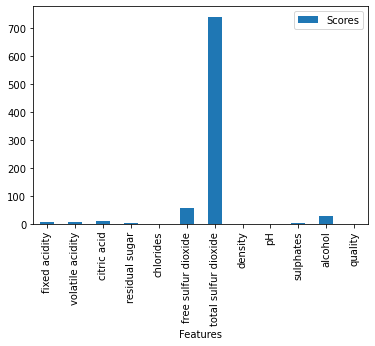

In [138]:
features_table.plot.bar('Features','Scores')

## Save the model

In [165]:
from joblib import dump, load

dump(RandomForestClassifier, filename = 'Red_Wine_Quality_Test_model.joblib')

['Red_Wine_Quality_Test_model.joblib']